In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib as mpl
 
mpl.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_2103 = df[df['기준년월'] == 202103]
df_2103.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
390089,202103,11,패션잡화,1111,신발,여성,50대,성인자녀가구,서울특별시,구로구,궁동,318490,7
390090,202103,11,패션잡화,1110,양말,여성,50대,성인자녀가구,서울특별시,강동구,길동,1469083,19
390091,202103,20,여가/스포츠,2013,여행,남성,30대,1인가구,서울특별시,강동구,길동,1042413,30
390092,202103,20,여가/스포츠,2010,스포츠,남성,40대,초중고자녀가구,서울특별시,강동구,길동,140273,5
390093,202103,17,생활,1710,생활용품,여성,60대 이상,노인가구,서울특별시,강동구,길동,428515,21
390094,202103,11,패션잡화,1110,양말,여성,30대,신혼영유아가구,서울특별시,광진구,능동,45597,5
390095,202103,15,전자,1511,디지털,남성,30대,신혼영유아가구,서울특별시,광진구,능동,1193531,14
390099,202103,11,패션잡화,1112,가방,남성,40대,초중고자녀가구,서울특별시,양천구,목동,1242008,10
390100,202103,15,전자,1510,가전,여성,20대,1인가구,서울특별시,양천구,목동,3300270,31
390101,202103,13,가구,1314,기타,여성,30대,1인가구,서울특별시,양천구,목동,244110,5


In [5]:
sigoongu = list(set(df_2103['고객소재지_시군구']))
print(len(sigoongu))

big_category = list(set(df_2103['품목대분류명']))
print(len(big_category))

middle_category = list(set(df_2103['품목중분류명']))
print(len(middle_category))

lifestyle = list(set(df_2103['가구생애주기']))
print(len(lifestyle))

25
13
50
5


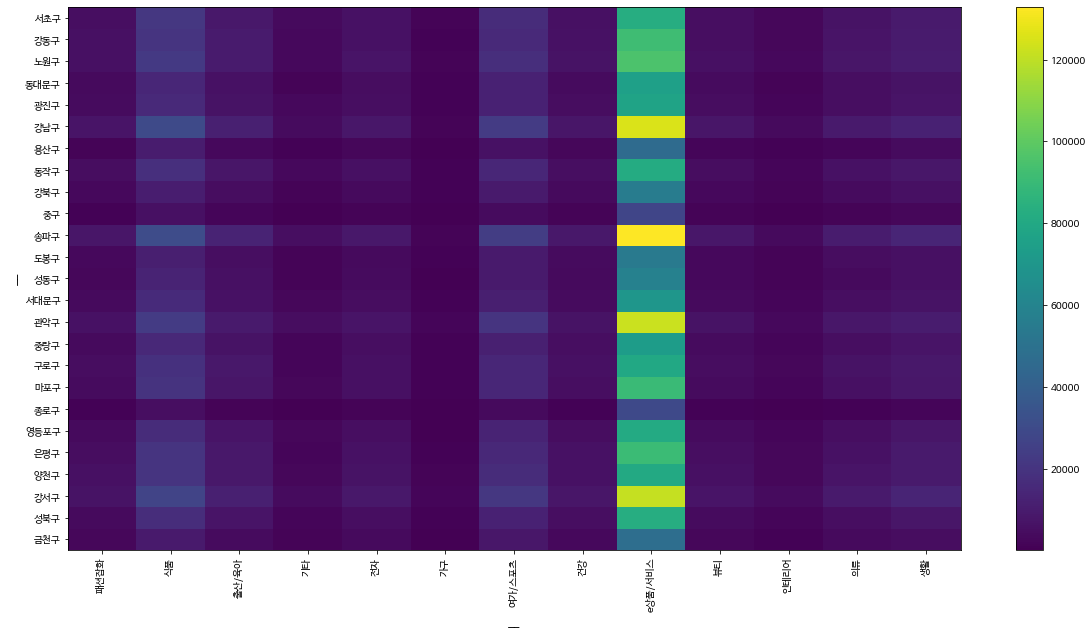

In [6]:
# 시군구 - 매출건수
pack = []
for gu in sigoongu:
    temp = df_2103[df_2103['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_large = sigoongu_moneycount_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_moneycount_large)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_large.columns), 1), sigoongu_moneycount_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_large.index), 1), sigoongu_moneycount_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [7]:
# 클러스터링
# 시군구 - 매출건수

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_moneycount_large['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_moneycount_large[sigoongu_moneycount_large['cluster_id'] == i]
    print(temp['cluster_id'])

강서구    0
관악구    0
송파구    0
강남구    0
Name: cluster_id, dtype: int32
성북구     1
양천구     1
영등포구    1
구로구     1
중랑구     1
서대문구    1
동작구     1
광진구     1
동대문구    1
서초구     1
Name: cluster_id, dtype: int32
종로구    2
중구     2
Name: cluster_id, dtype: int32
금천구    3
성동구    3
도봉구    3
강북구    3
용산구    3
Name: cluster_id, dtype: int32
은평구    4
마포구    4
노원구    4
강동구    4
Name: cluster_id, dtype: int32


In [8]:
# 데이터 프레임 재구성
dict = {}
sigoongu_name = sigoongu_moneycount_large.index
cluster_label = sigoongu_moneycount_large['cluster_id'].tolist()

for i in range(25):
    dict[sigoongu_name[i]] = cluster_label[i]

temp = []
for index, row in df_2103.iterrows():
    temp_dict = row.to_dict()
    temp_dict['large_moneycount_cluster'] = dict[row['고객소재지_시군구']]
    temp.append(temp_dict)
df_2103 = pd.DataFrame(temp)

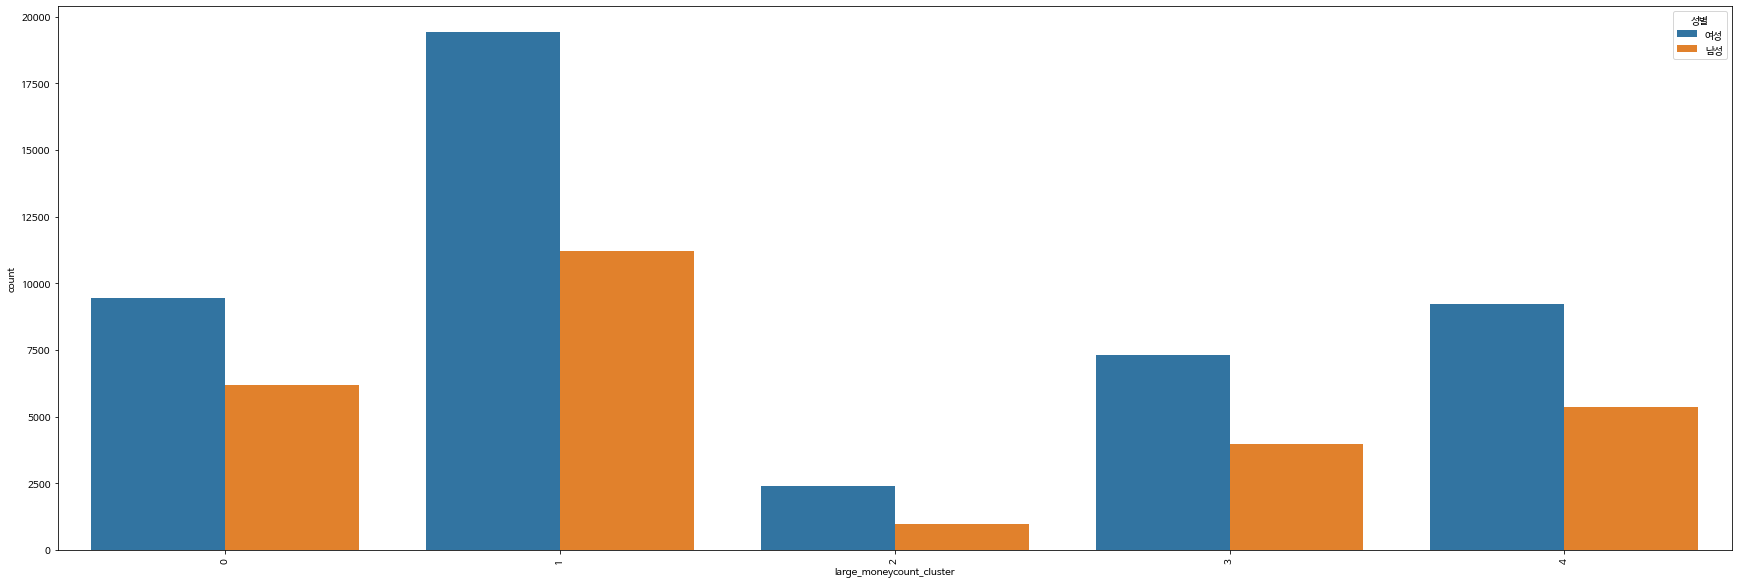

In [10]:
plt.figure(figsize=(30,10))
sns.countplot(x='large_moneycount_cluster', hue = '성별', data = df_2103)
plt.xticks(rotation = 90)
plt.show()

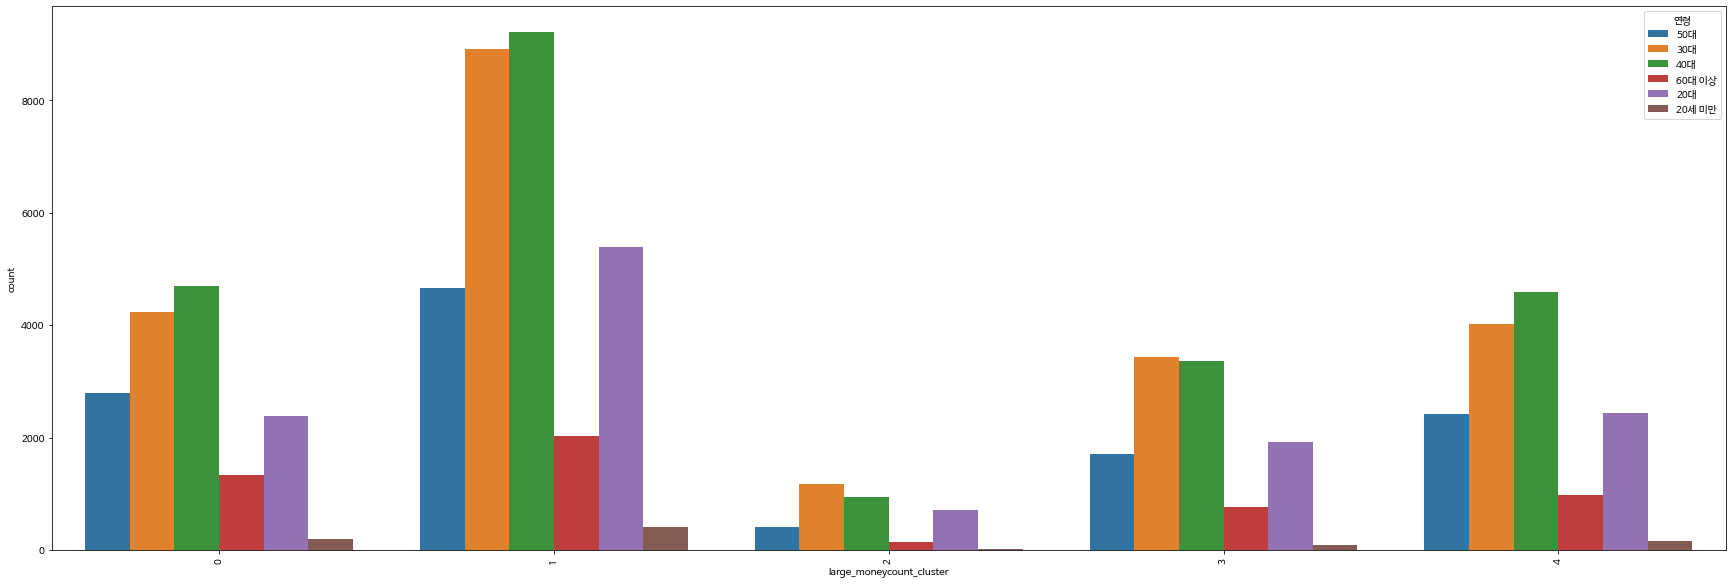

In [11]:
plt.figure(figsize=(30,10))
sns.countplot(x='large_moneycount_cluster', hue = '연령', data = df_2103)
plt.xticks(rotation = 90)
plt.show()

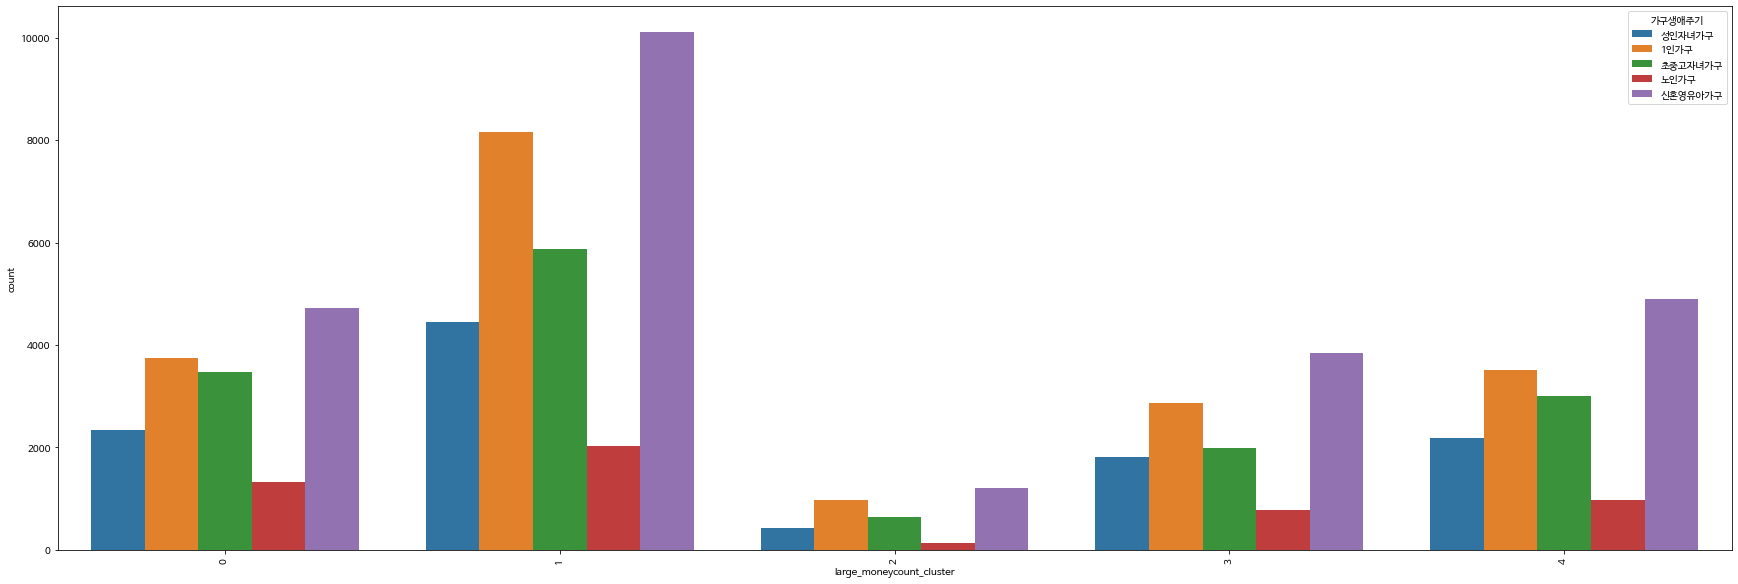

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(x='large_moneycount_cluster', hue = '가구생애주기', data = df_2103)
plt.xticks(rotation = 90)
plt.show()

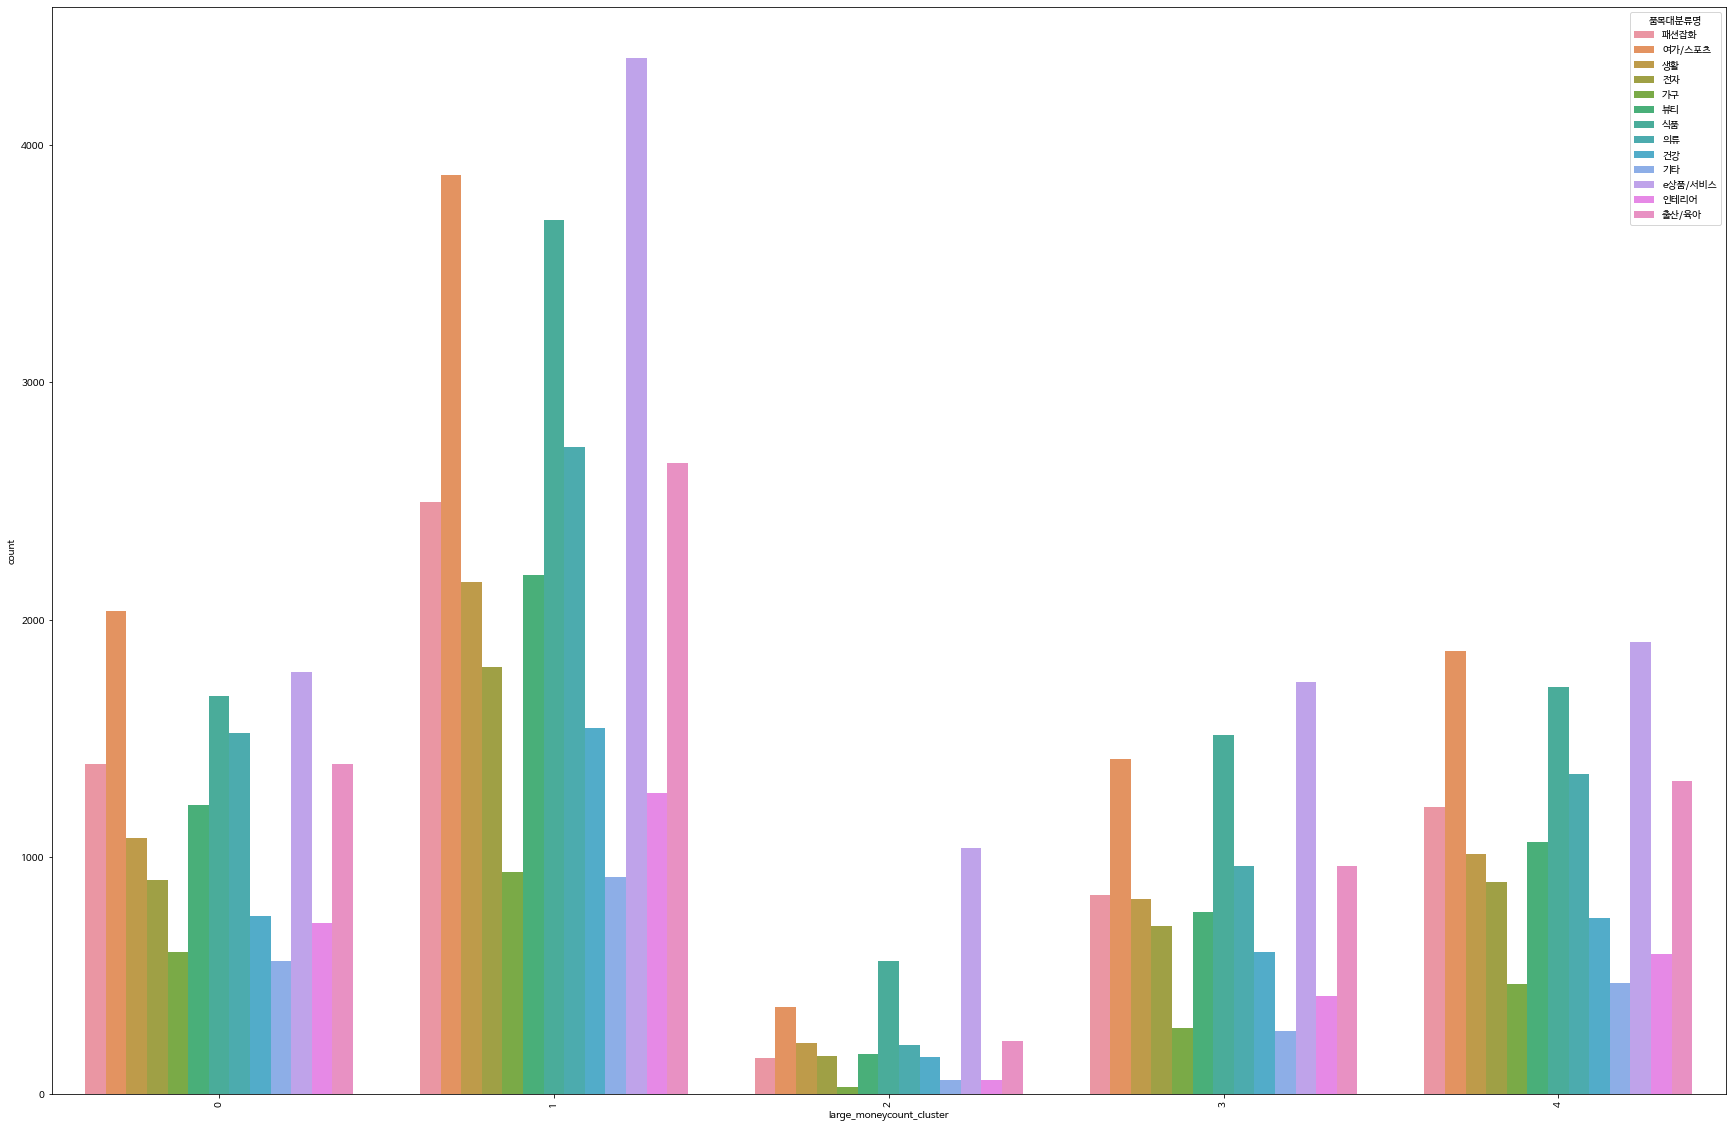

In [13]:
plt.figure(figsize=(30,20))
sns.countplot(x='large_moneycount_cluster', hue = '품목대분류명', data = df_2103)
plt.xticks(rotation = 90)
plt.show()

In [22]:
# cluster == 0
df_2103_cluster0 = df_2103[df_2103['large_moneycount_cluster'] == 0]
cluster0_list = []
cluster0_list = df_2103_cluster0['고객소재지_시군구'].unique()

print(cluster0_list)

iscluster0 = []
for i in range(len(cluster0_list)):
    iscluster0.append(df_2103_cluster0['고객소재지_시군구'] == cluster0_list[i])
    
cluster0 = []
for i in range(len(cluster0_list)):
    cluster0.append(df_2103_cluster0[iscluster0[i]])

['송파구' '강서구' '강남구' '관악구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

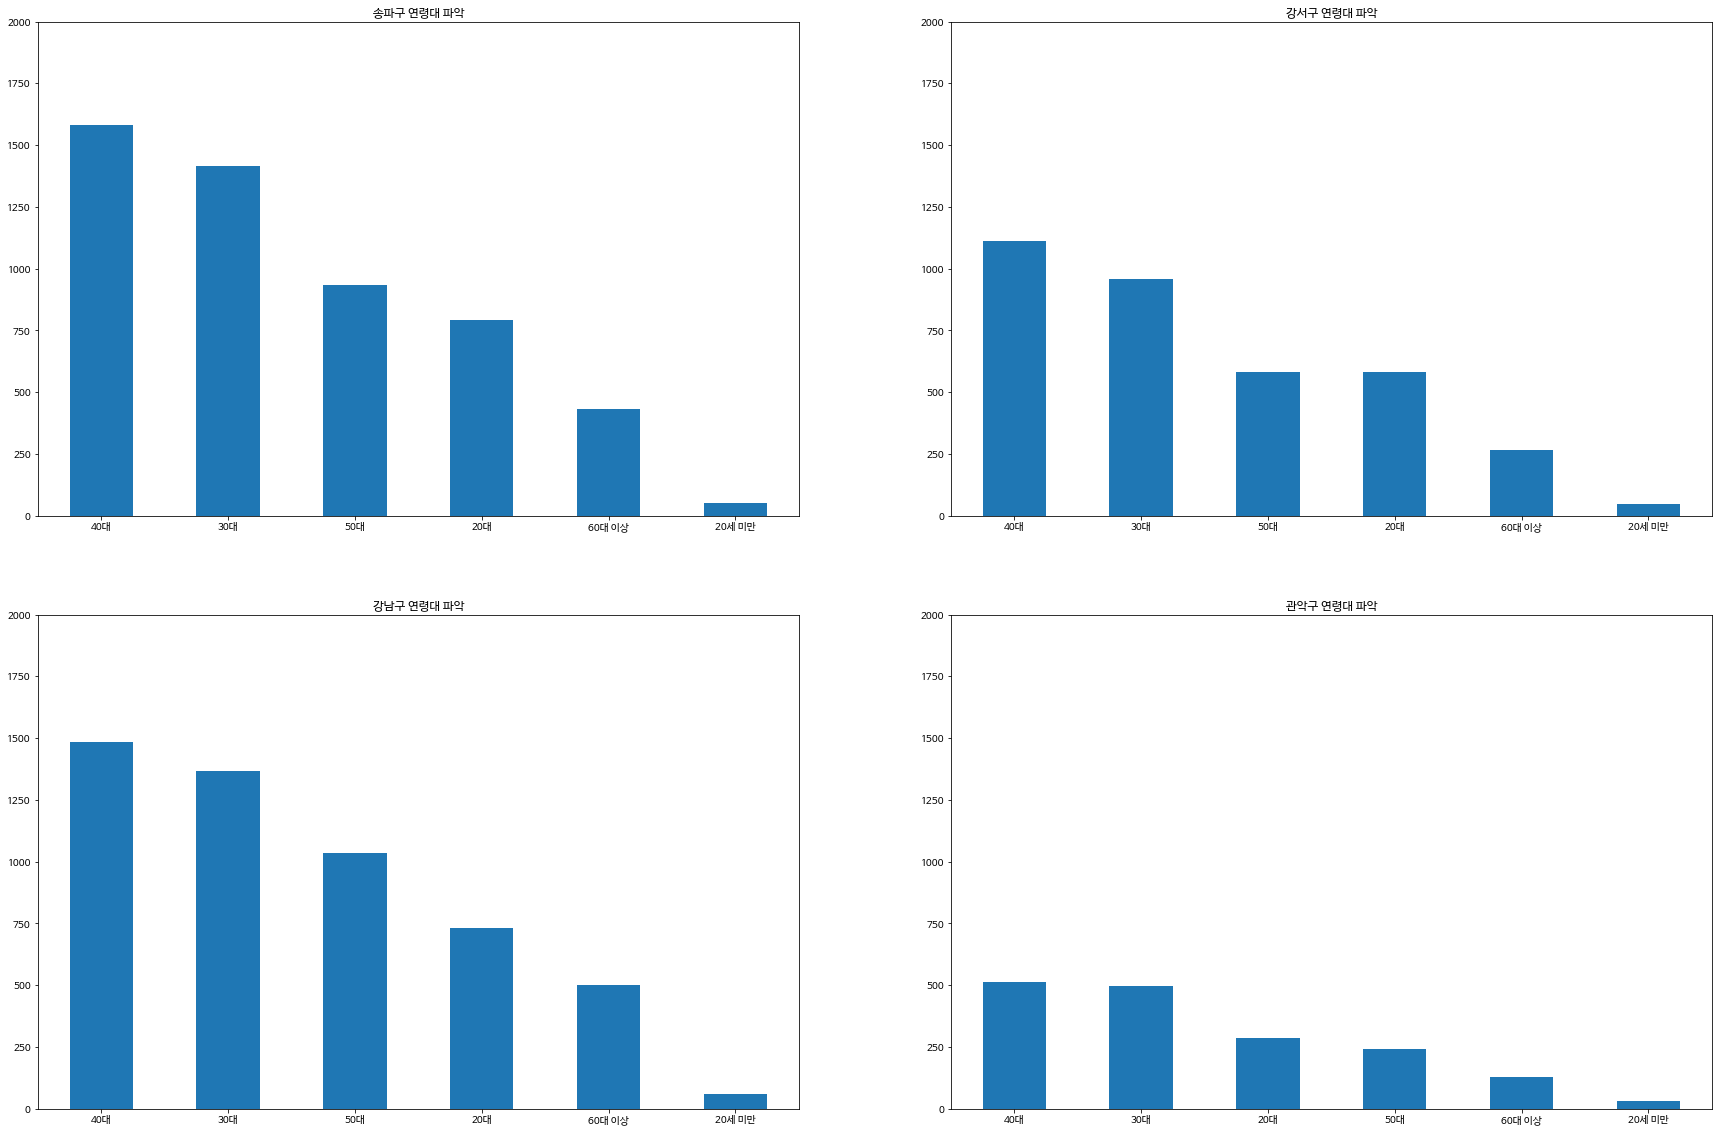

In [23]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,2,j+1)
    cluster0[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 2000])
    plt.xticks(rotation=0)
    plt.title(cluster0_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

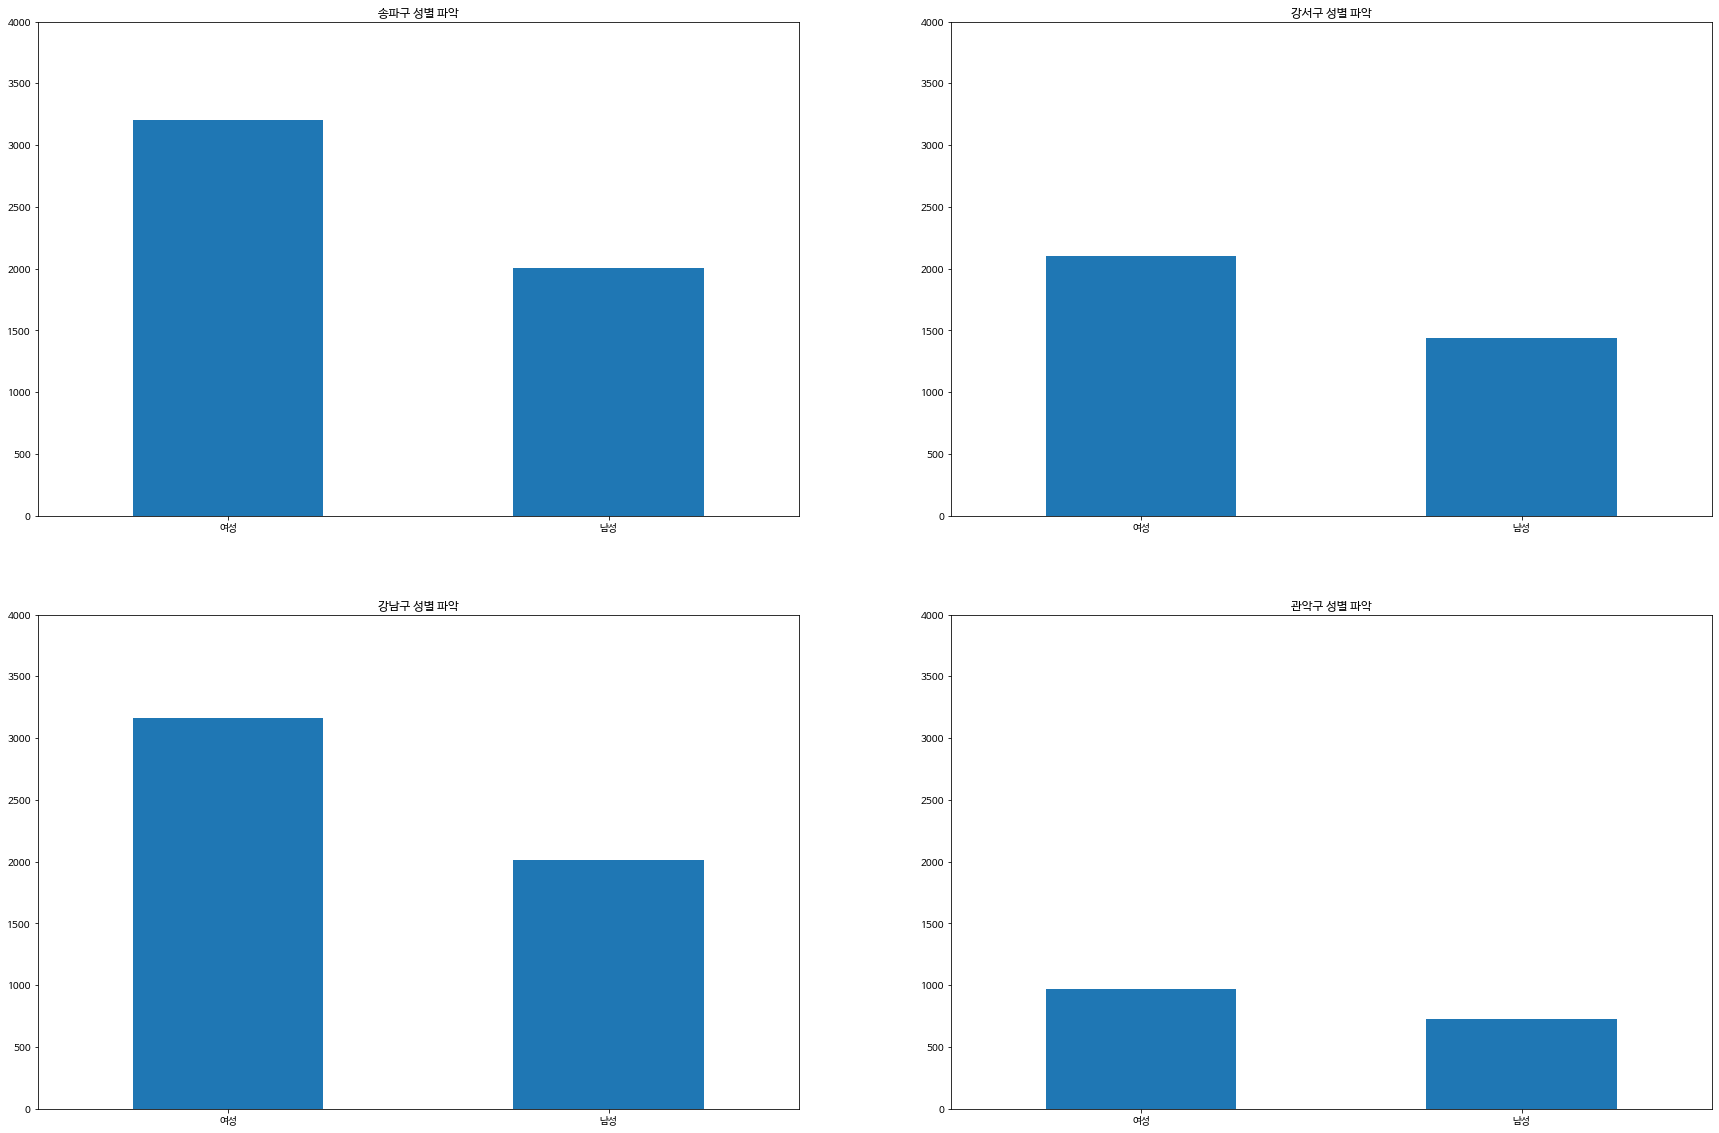

In [25]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,2,j+1)
    cluster0[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 4000])
    plt.xticks(rotation=0)
    plt.title(cluster0_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

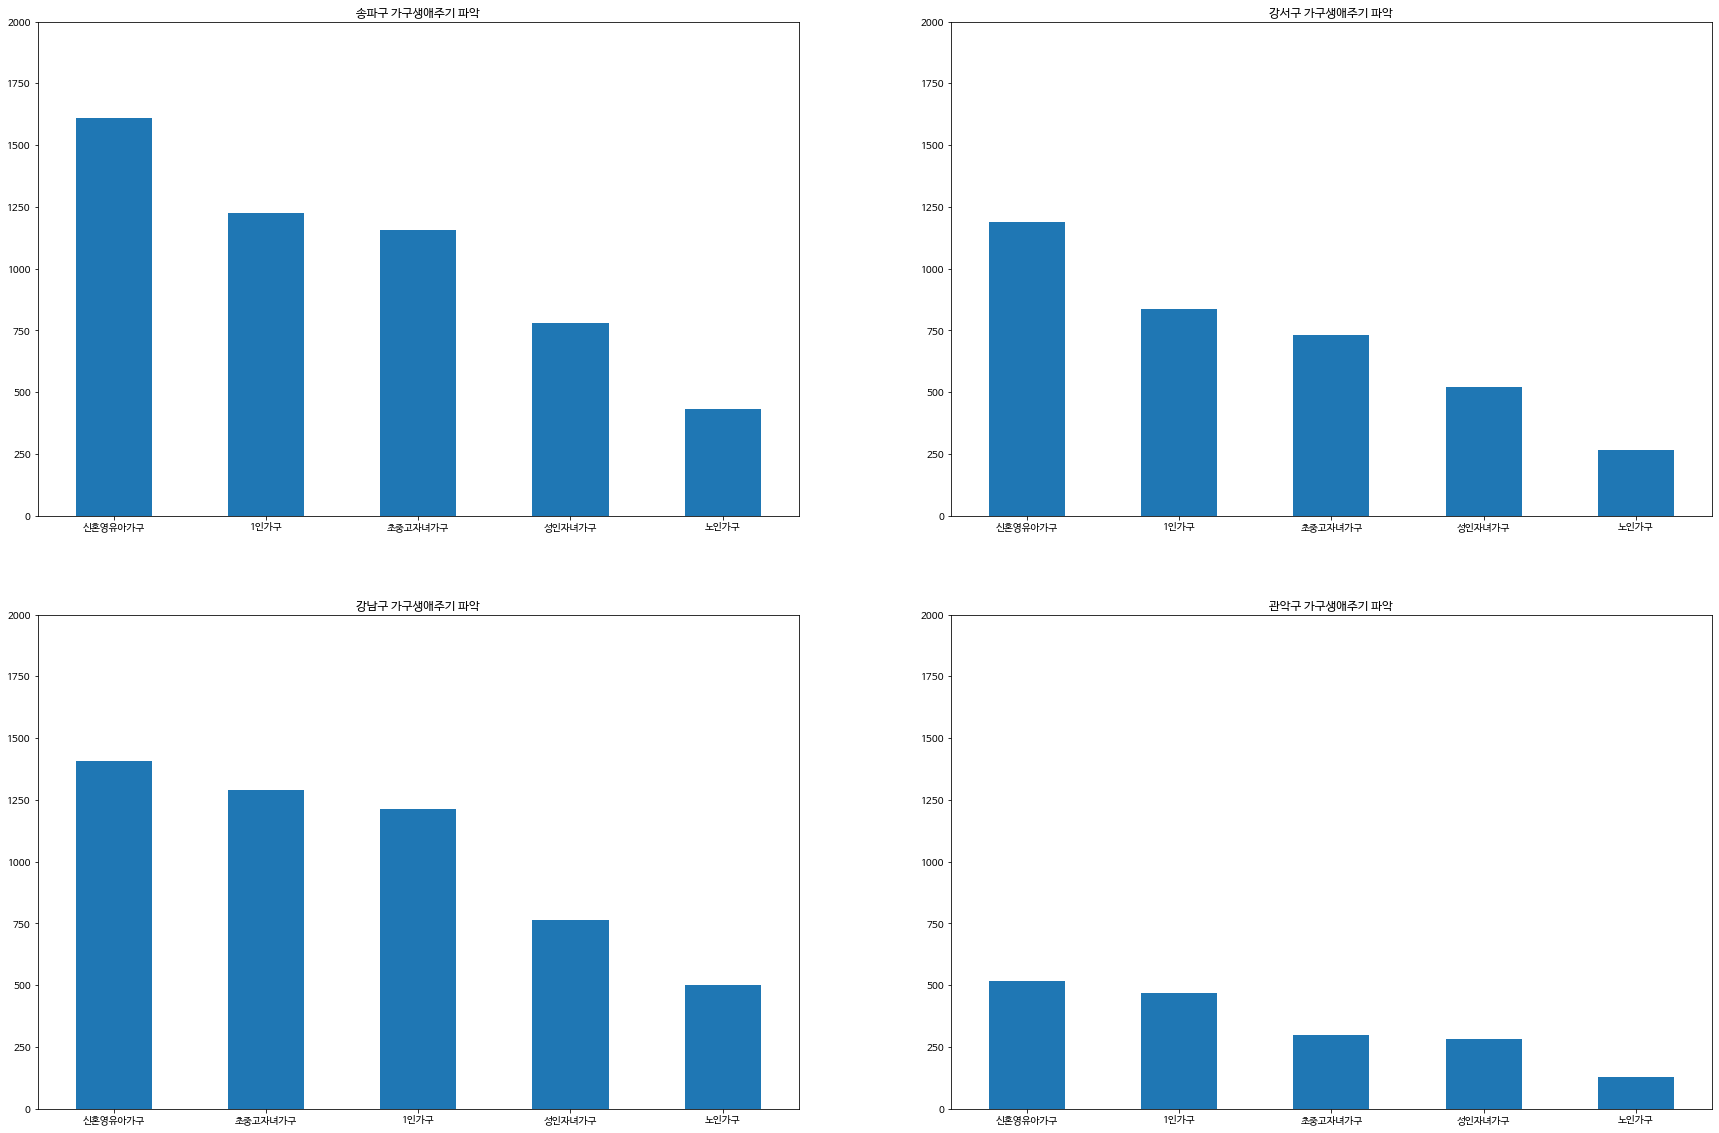

In [27]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,2,j+1)
    cluster0[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 2000])
    plt.xticks(rotation=0)
    plt.title(cluster0_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

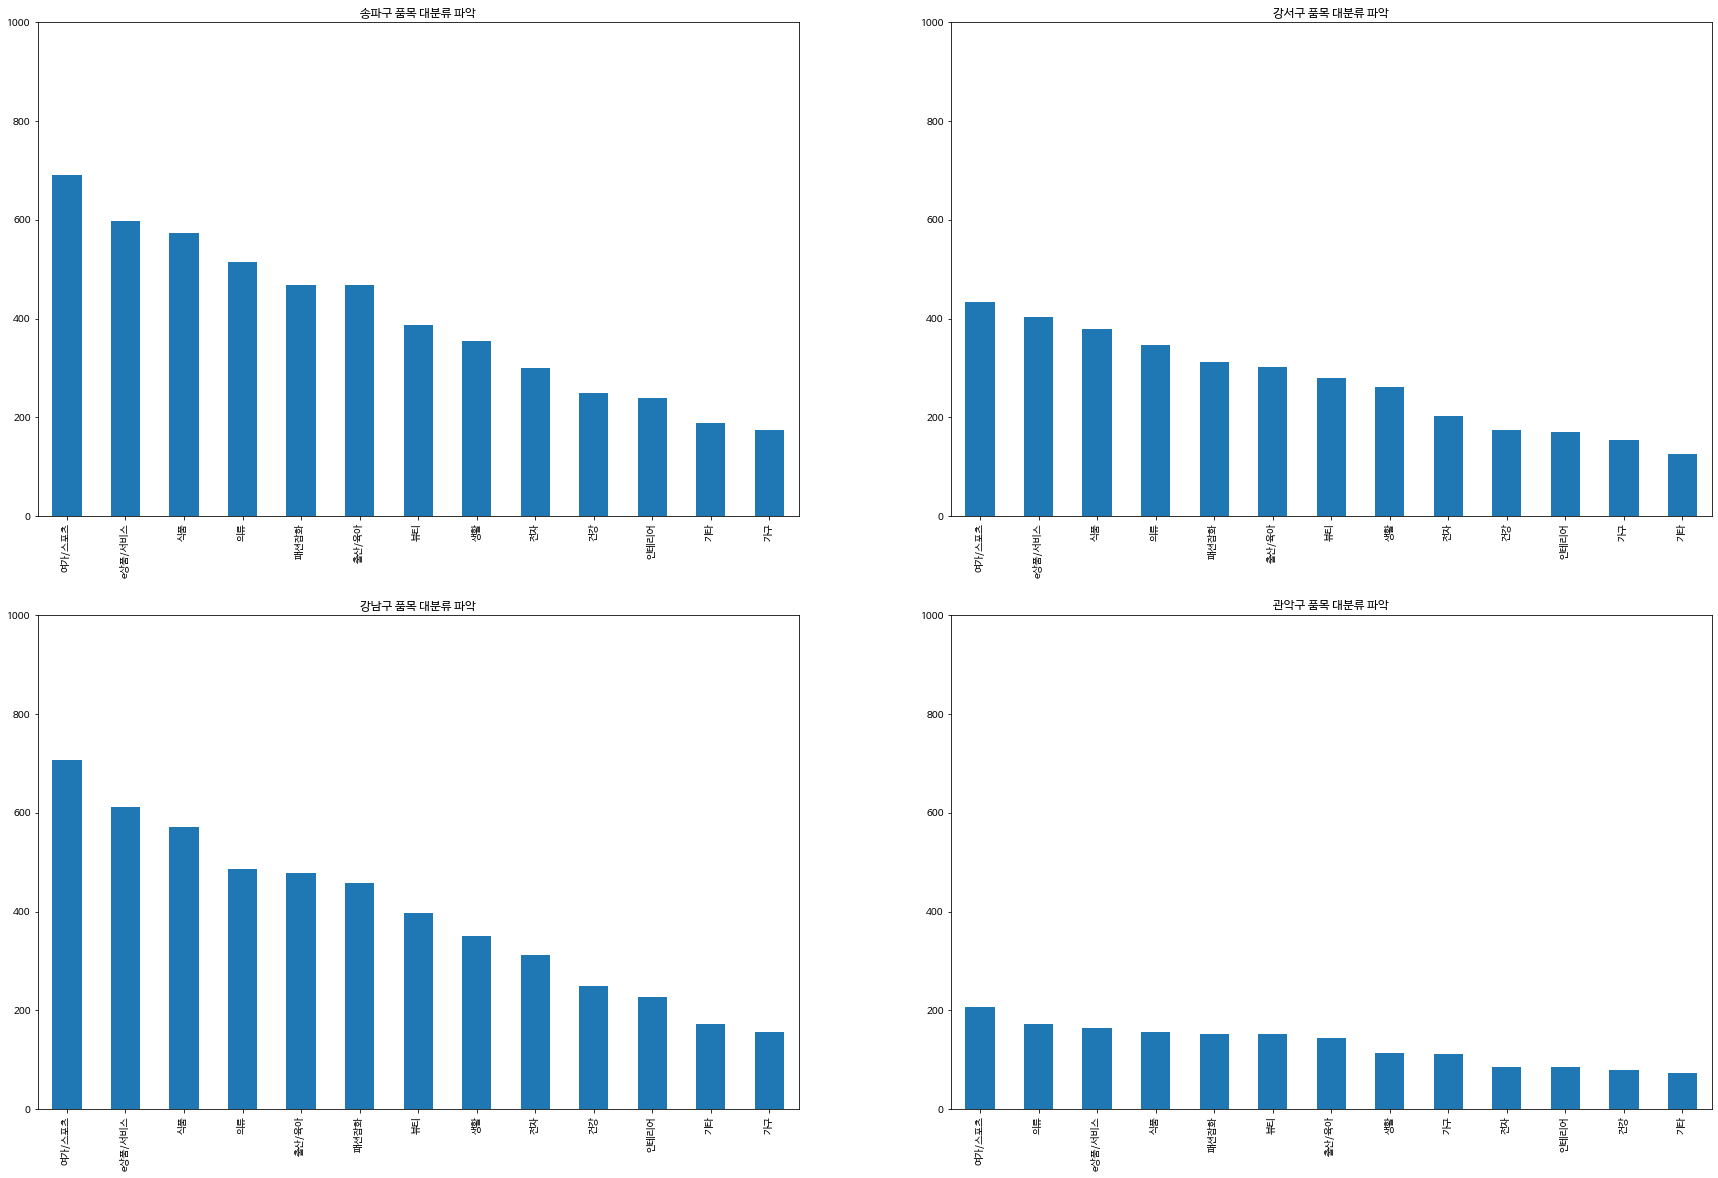

In [28]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,2,j+1)
    cluster0[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.title(cluster0_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

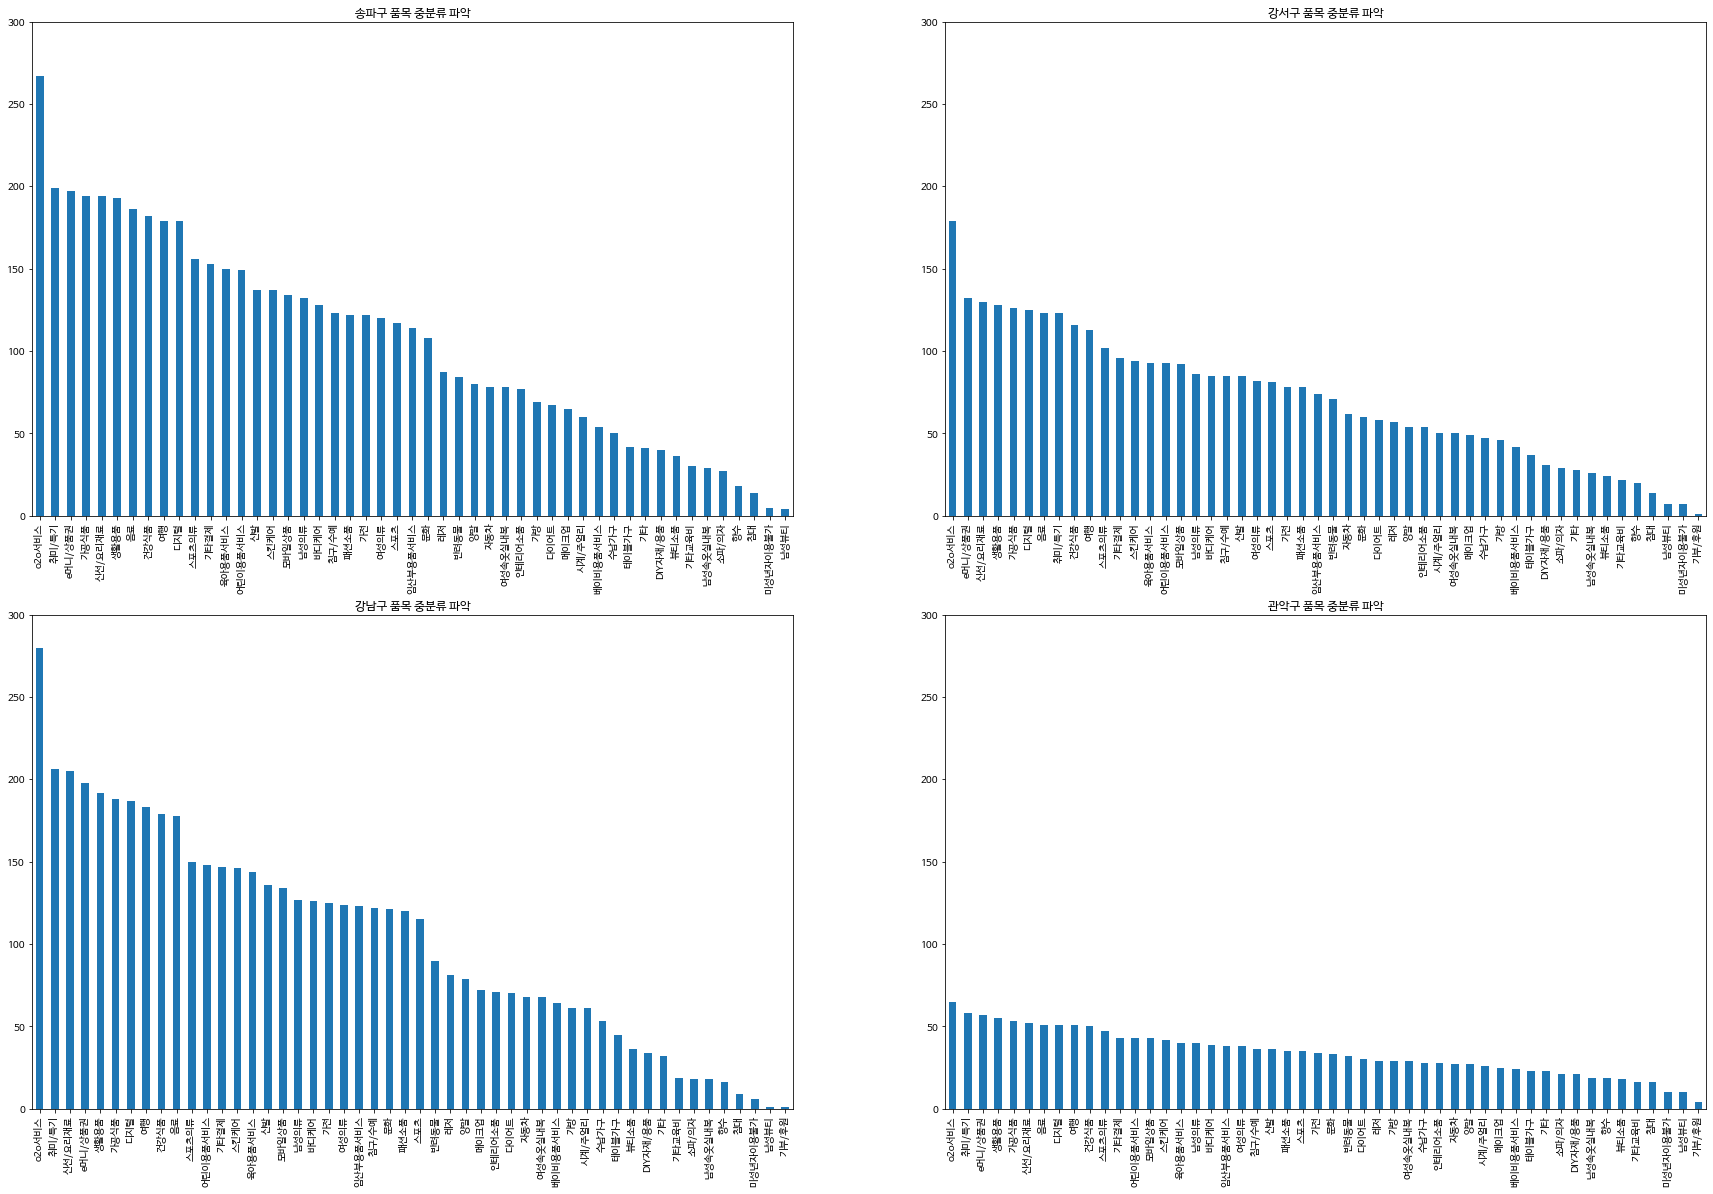

In [29]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,2,j+1)
    cluster0[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 300])
    plt.title(cluster0_list[j]+ ' 품목 중분류 파악')

plt.plot

In [30]:
# cluster == 1
df_2103_cluster1 = df_2103[df_2103['large_moneycount_cluster'] == 1]
cluster1_list = []
cluster1_list = df_2103_cluster1['고객소재지_시군구'].unique()

print(cluster1_list)

iscluster1 = []
for i in range(len(cluster1_list)):
    iscluster1.append(df_2103_cluster1['고객소재지_시군구'] == cluster1_list[i])
    
cluster1 = []
for i in range(len(cluster1_list)):
    cluster1.append(df_2103_cluster1[iscluster1[i]])

['구로구' '광진구' '양천구' '중랑구' '동작구' '성북구' '서초구' '영등포구' '서대문구' '동대문구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

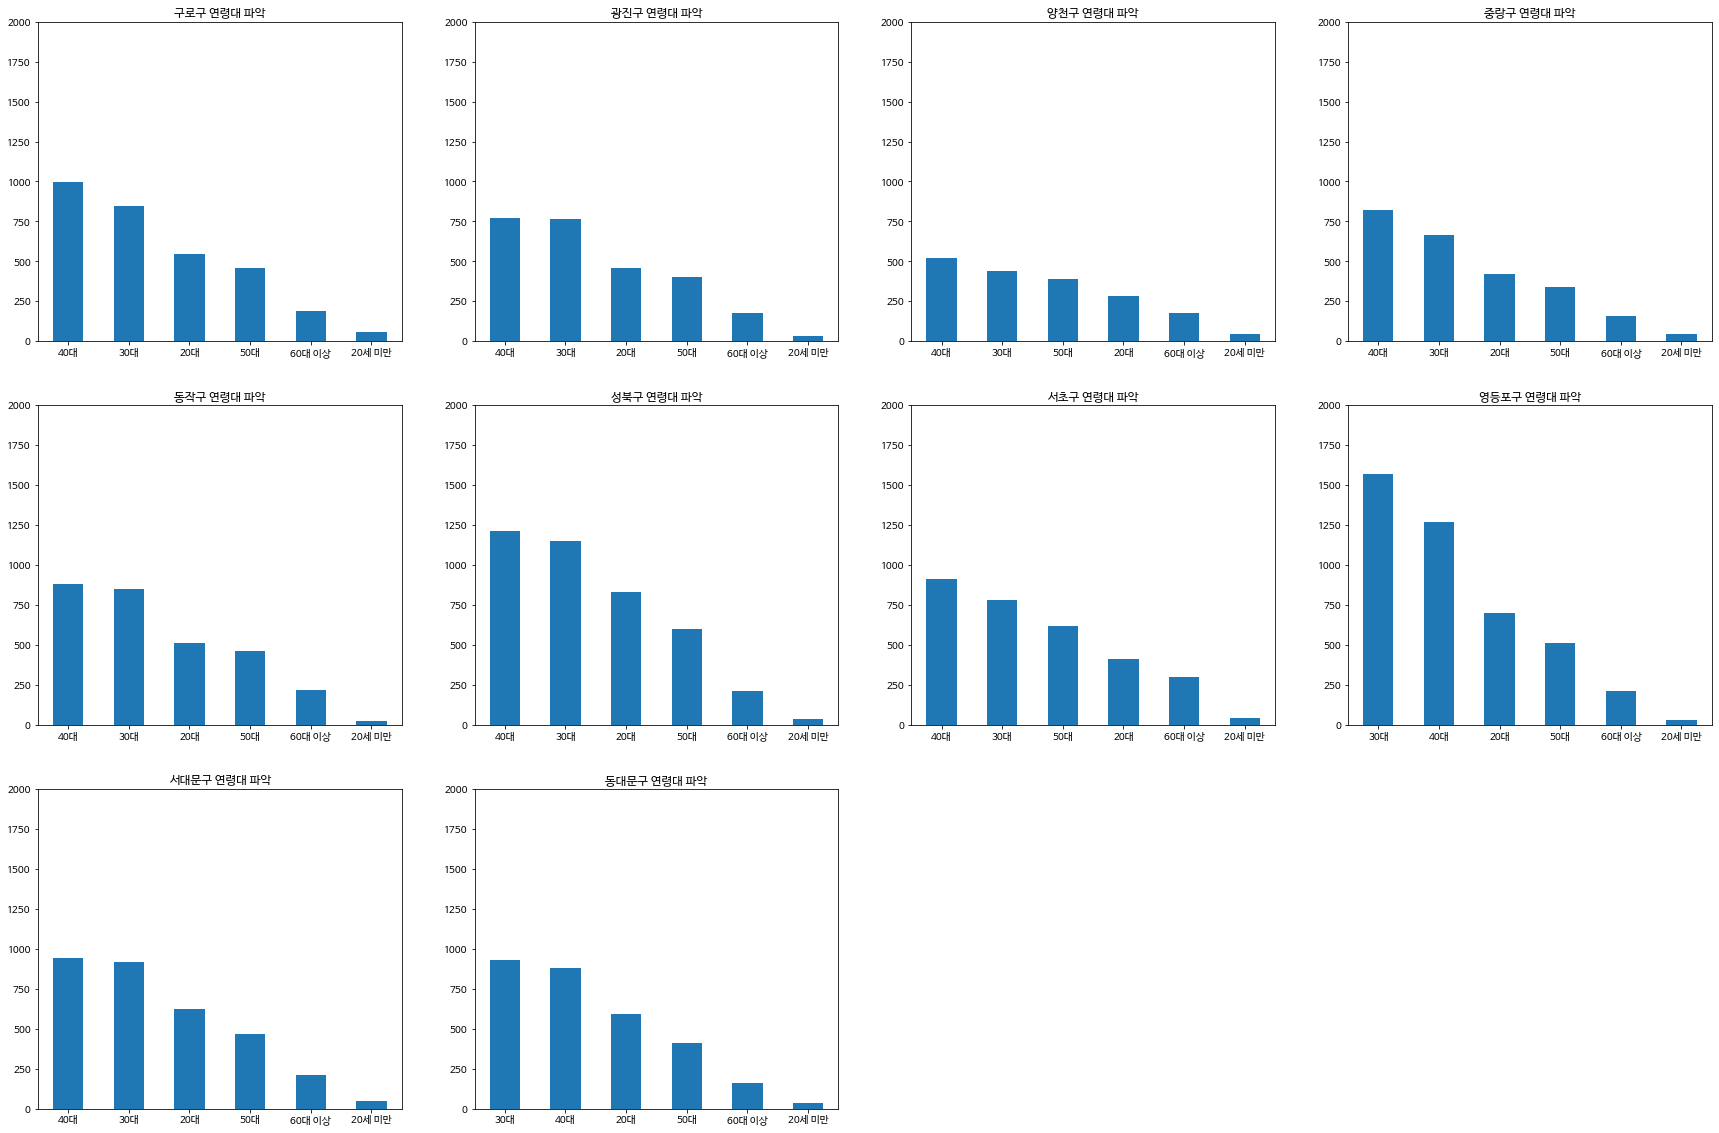

In [33]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(3,4,j+1)
    cluster1[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 2000])
    plt.xticks(rotation=0)
    plt.title(cluster1_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

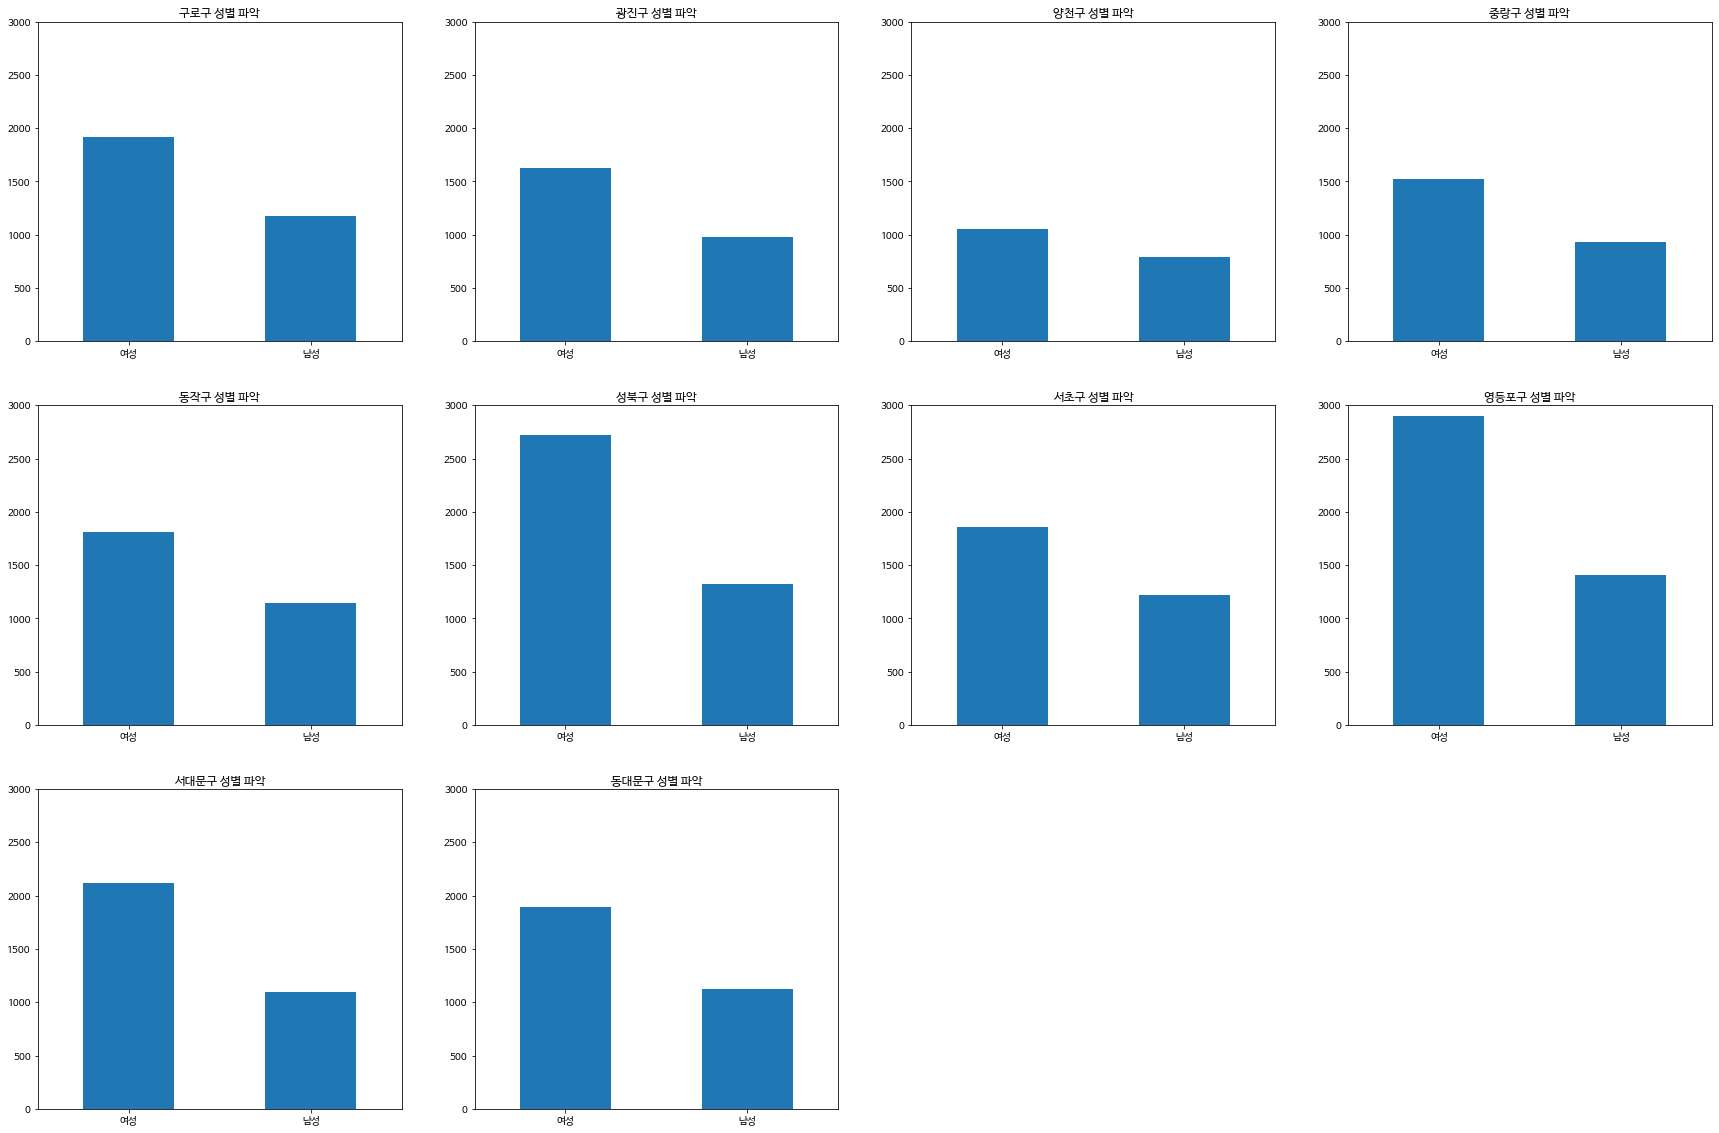

In [34]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(3,4,j+1)
    cluster1[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 3000])
    plt.xticks(rotation=0)
    plt.title(cluster1_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

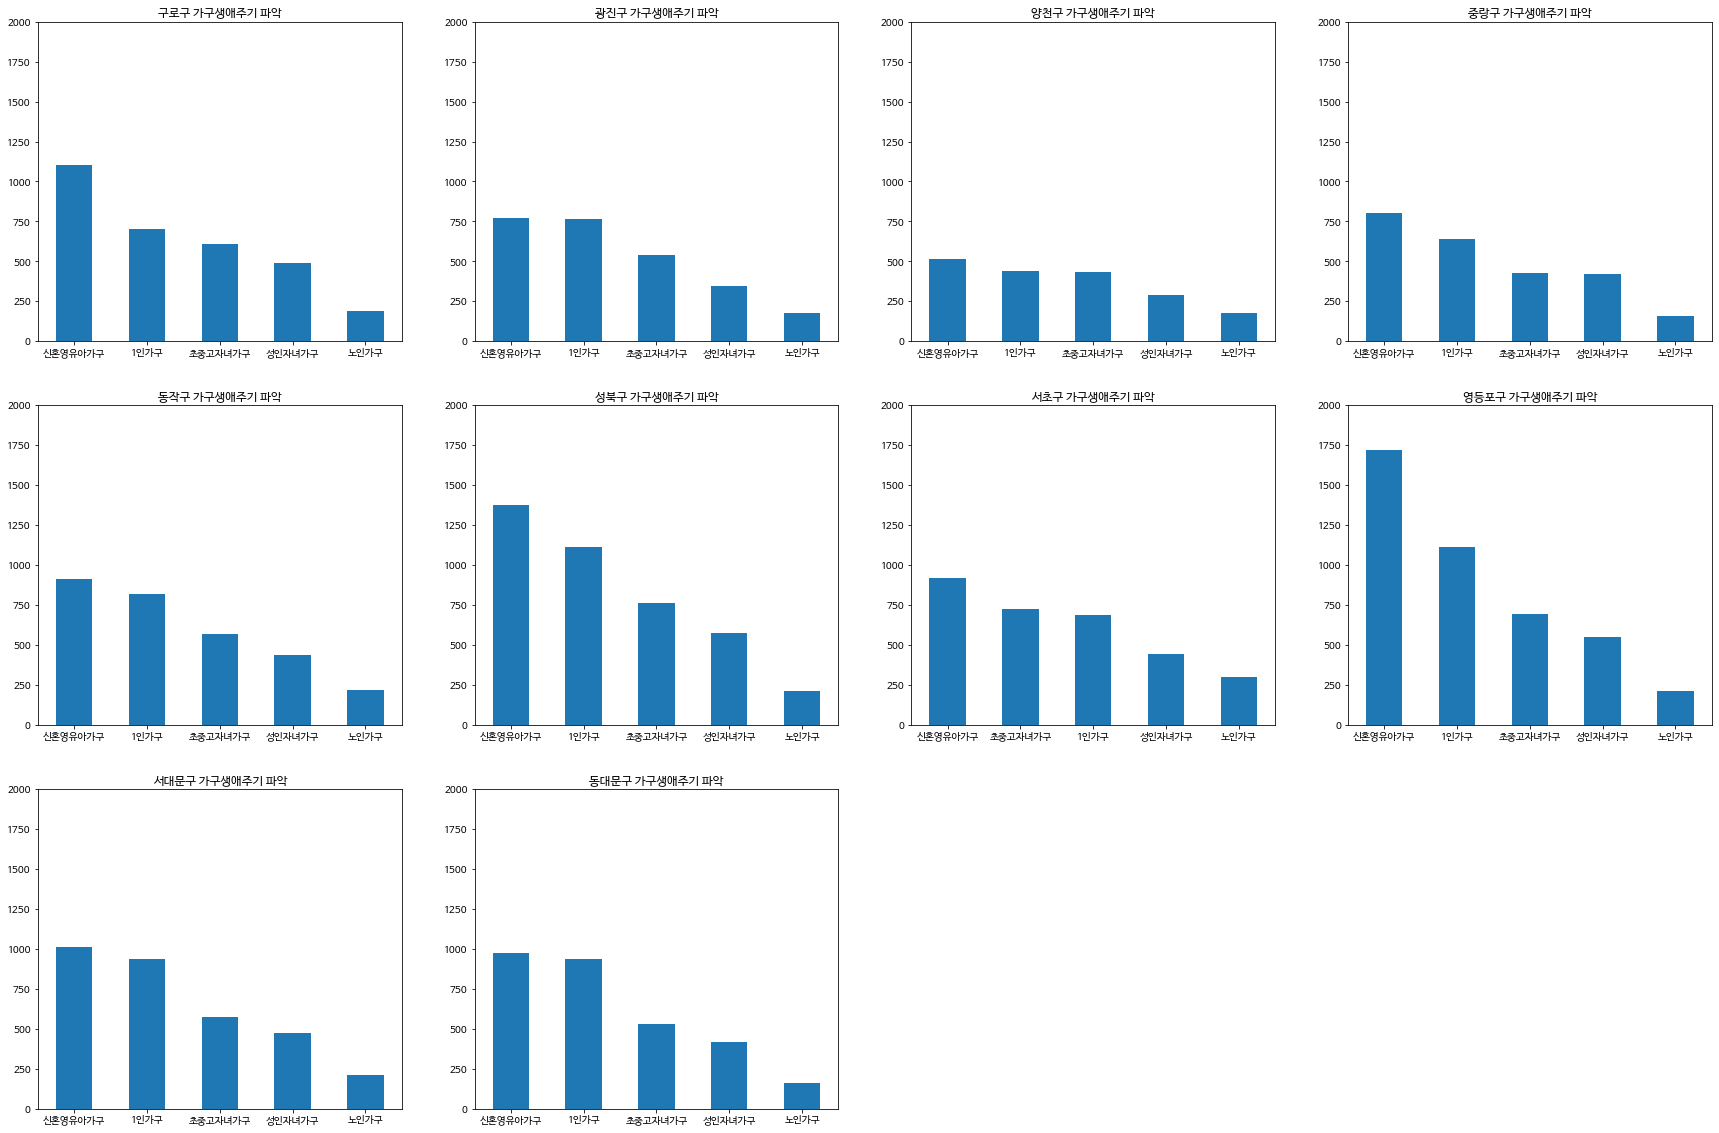

In [36]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(3,4,j+1)
    cluster1[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 2000])
    plt.xticks(rotation=0)
    plt.title(cluster1_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

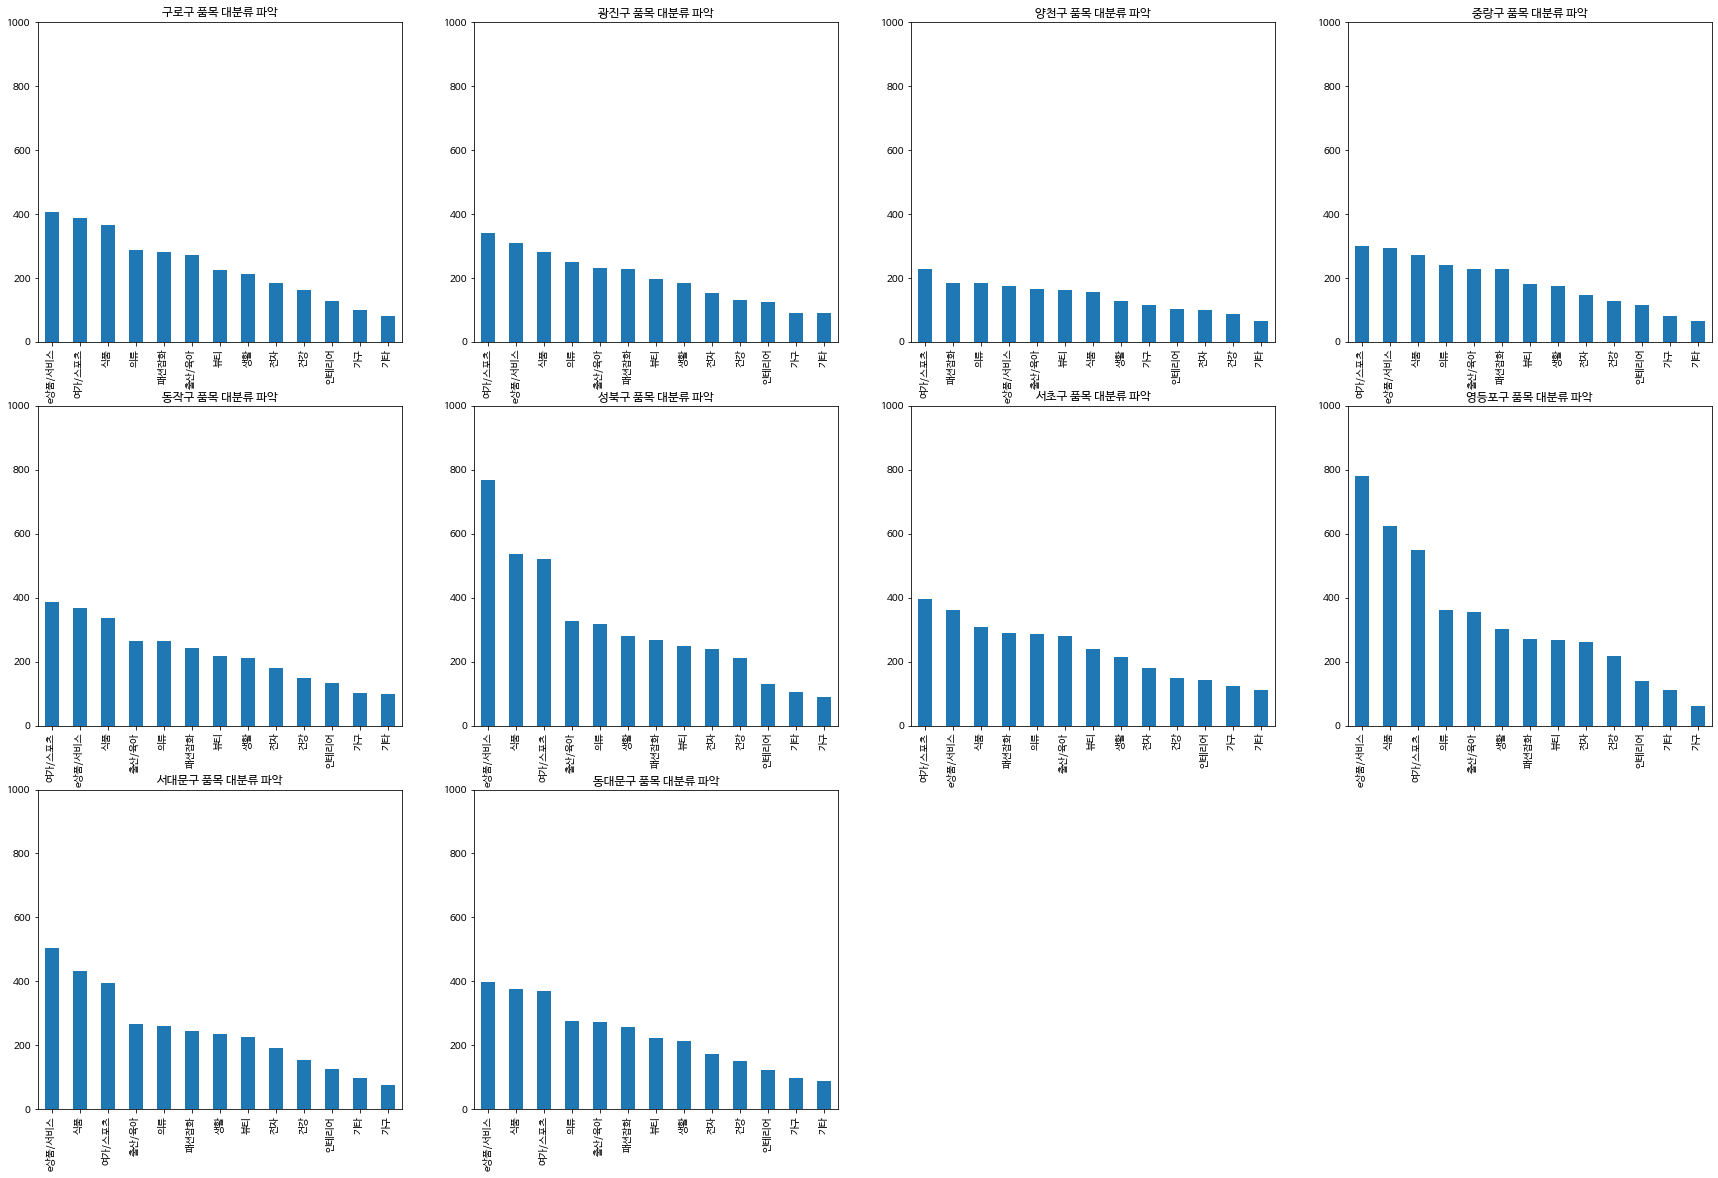

In [37]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(3,4,j+1)
    cluster1[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.title(cluster1_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

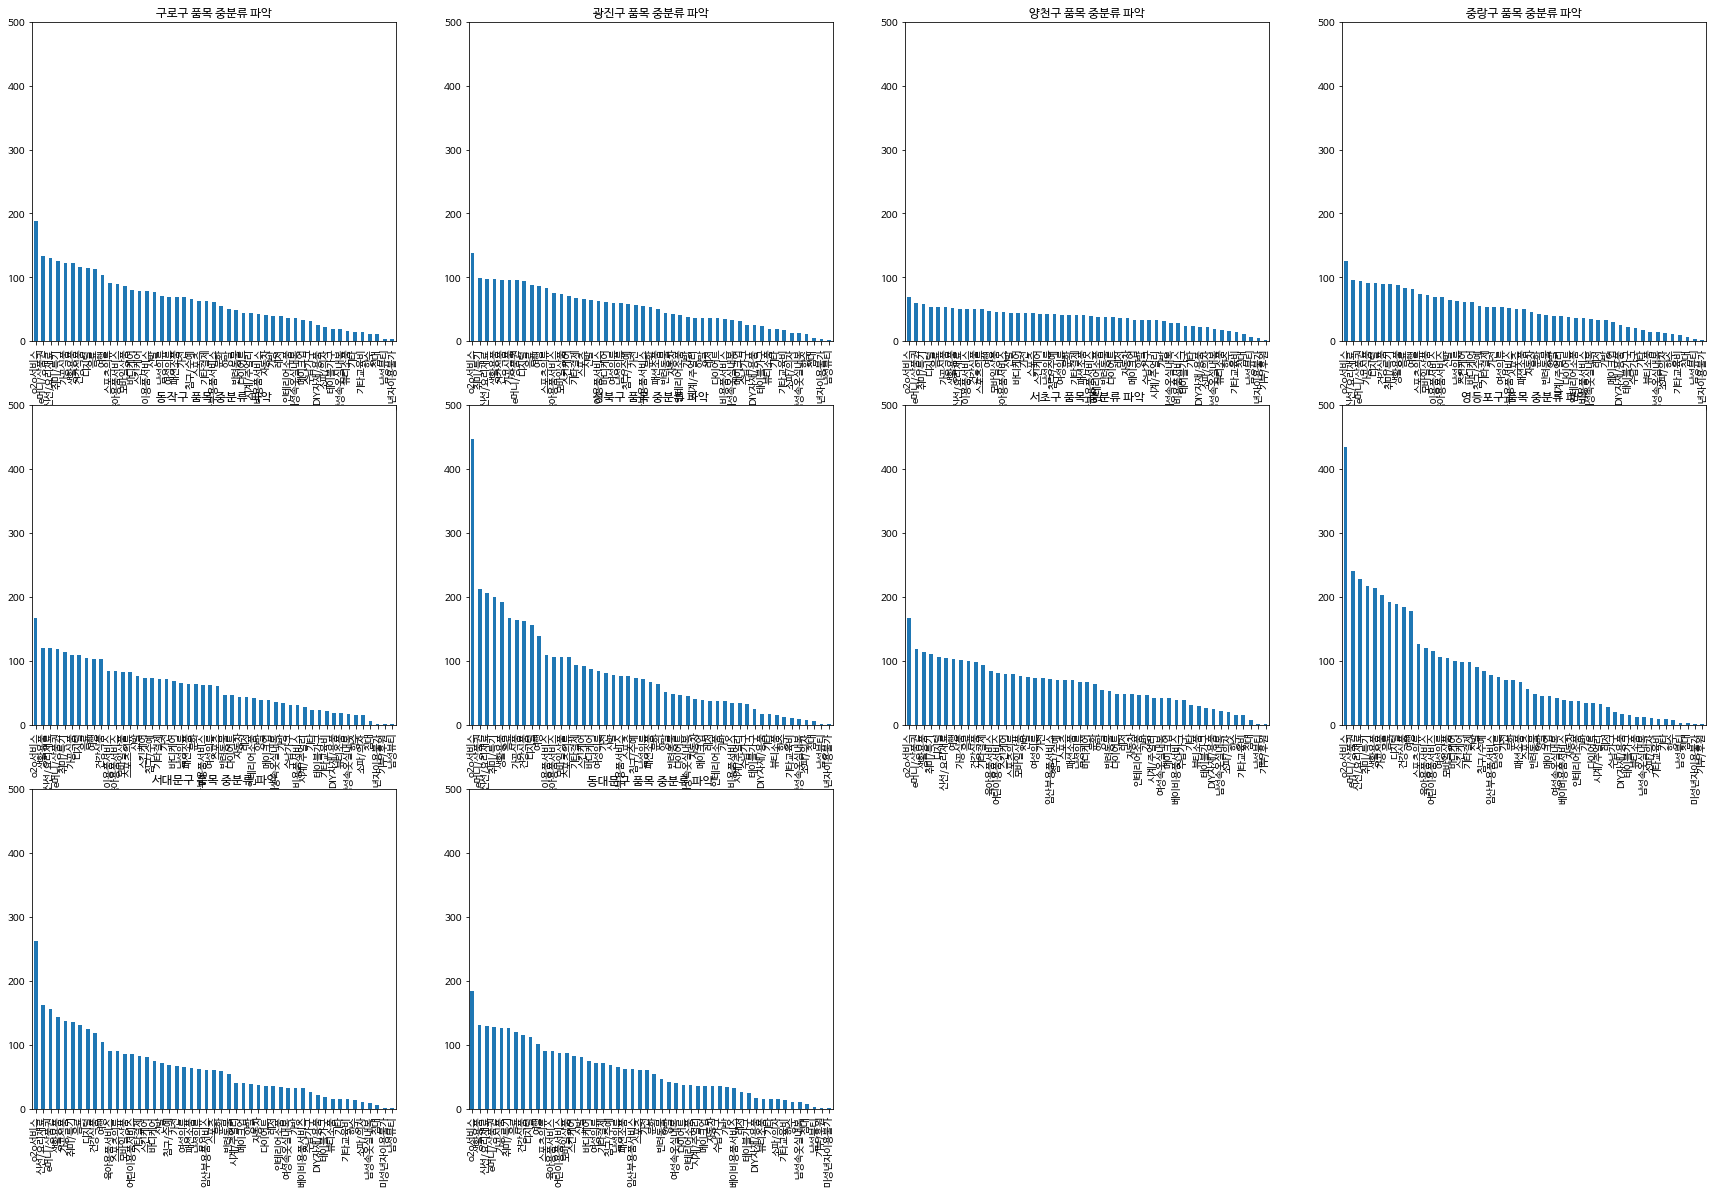

In [38]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(3,4,j+1)
    cluster1[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.title(cluster1_list[j]+ ' 품목 중분류 파악')

plt.plot

In [39]:
# cluster == 2
df_2103_cluster2 = df_2103[df_2103['large_moneycount_cluster'] == 2]
cluster2_list = []
cluster2_list = df_2103_cluster2['고객소재지_시군구'].unique()

print(cluster2_list)

iscluster2 = []
for i in range(len(cluster2_list)):
    iscluster2.append(df_2103_cluster2['고객소재지_시군구'] == cluster2_list[i])
    
cluster2 = []
for i in range(len(cluster2_list)):
    cluster2.append(df_2103_cluster2[iscluster2[i]])

['종로구' '중구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

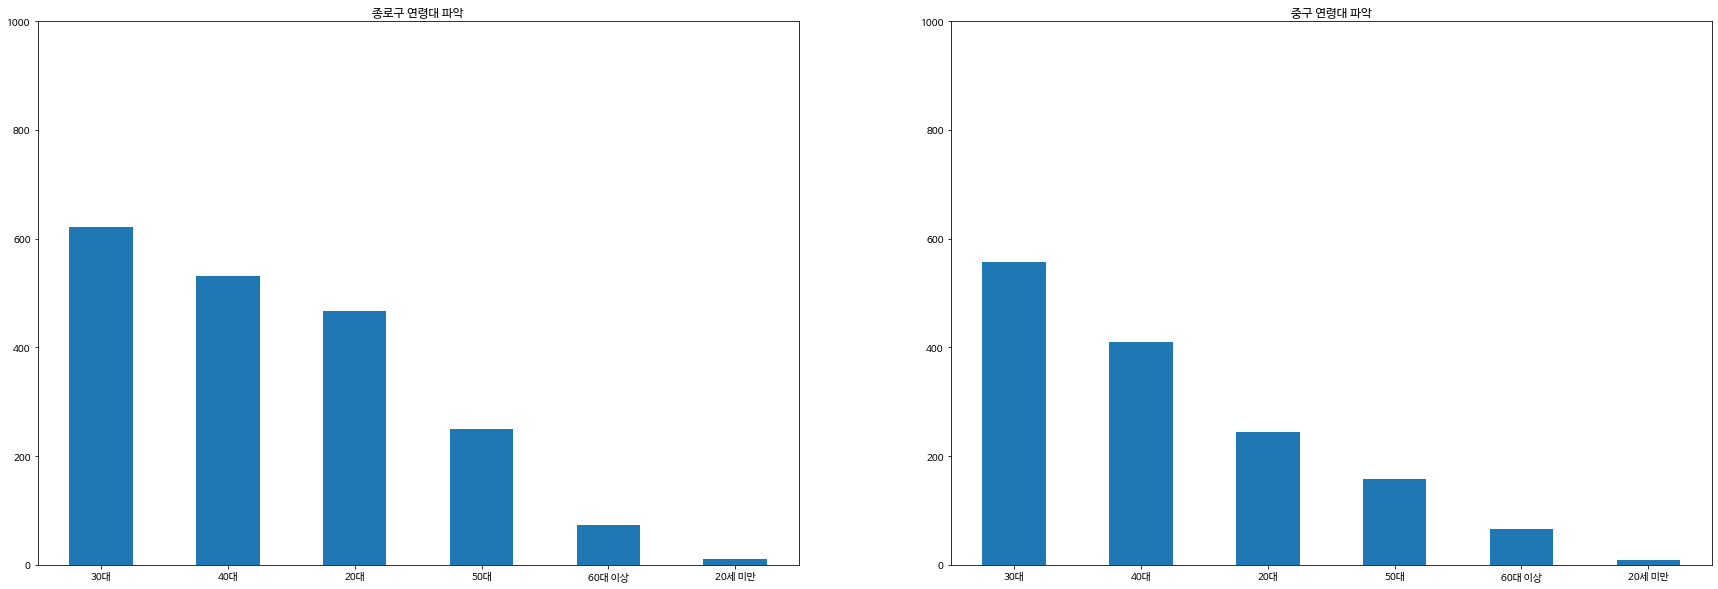

In [42]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(1,2,j+1)
    cluster2[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.xticks(rotation=0)
    plt.title(cluster2_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

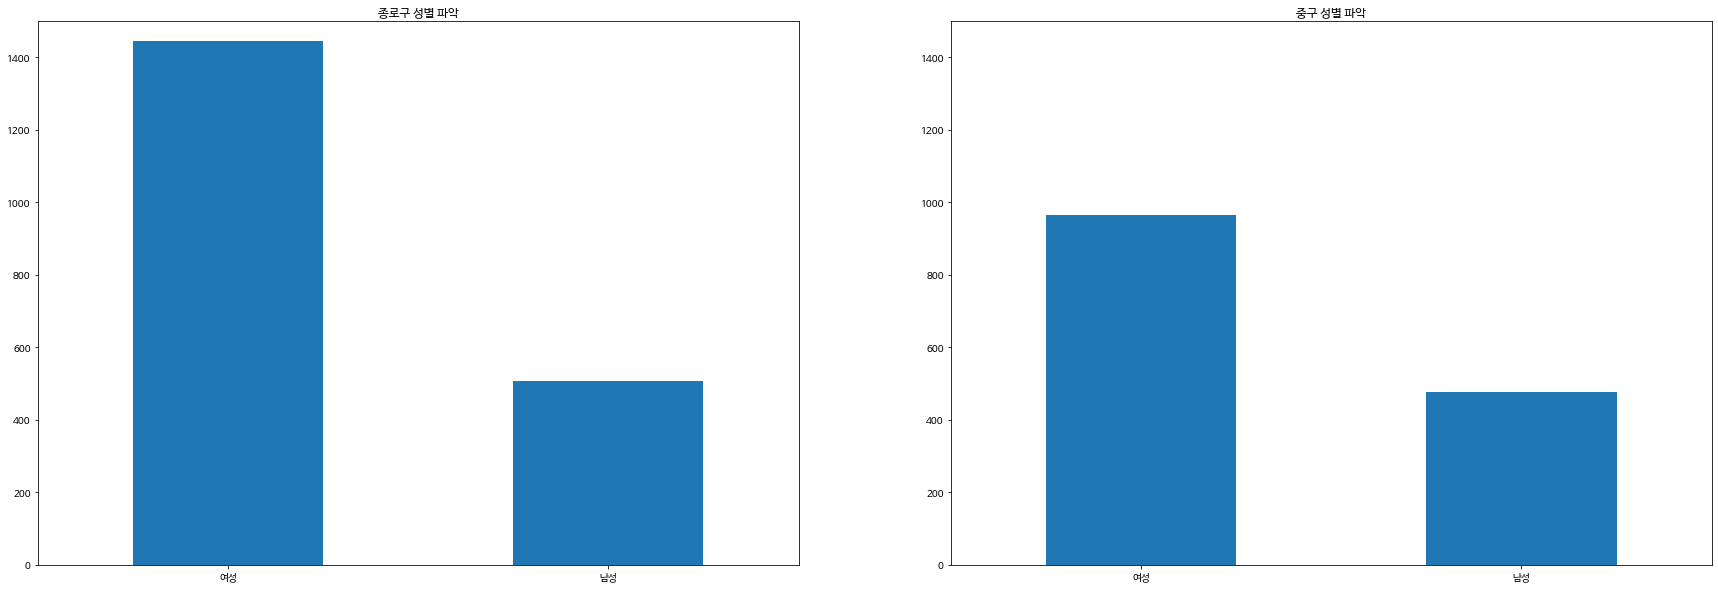

In [44]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(1,2,j+1)
    cluster2[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 1500])
    plt.xticks(rotation=0)
    plt.title(cluster2_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

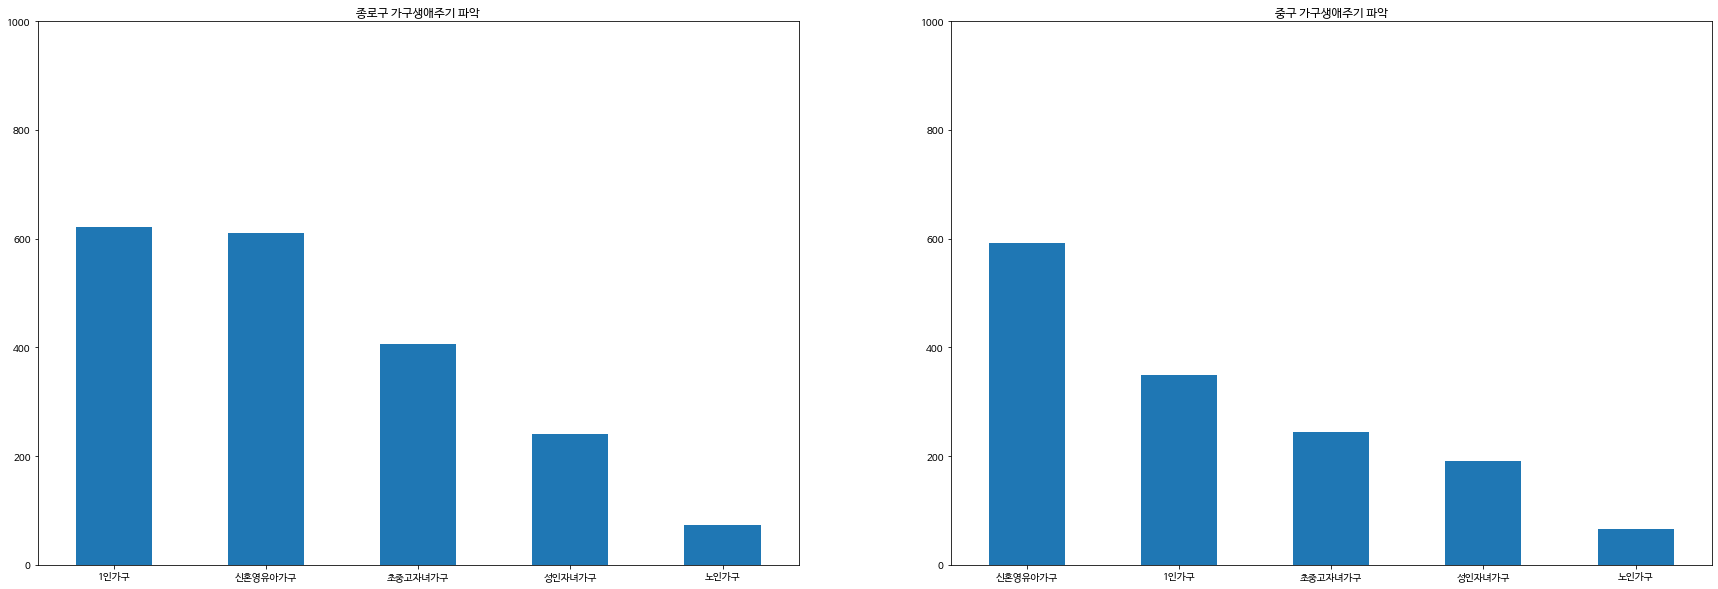

In [46]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(1,2,j+1)
    cluster2[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.xticks(rotation=0)
    plt.title(cluster2_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

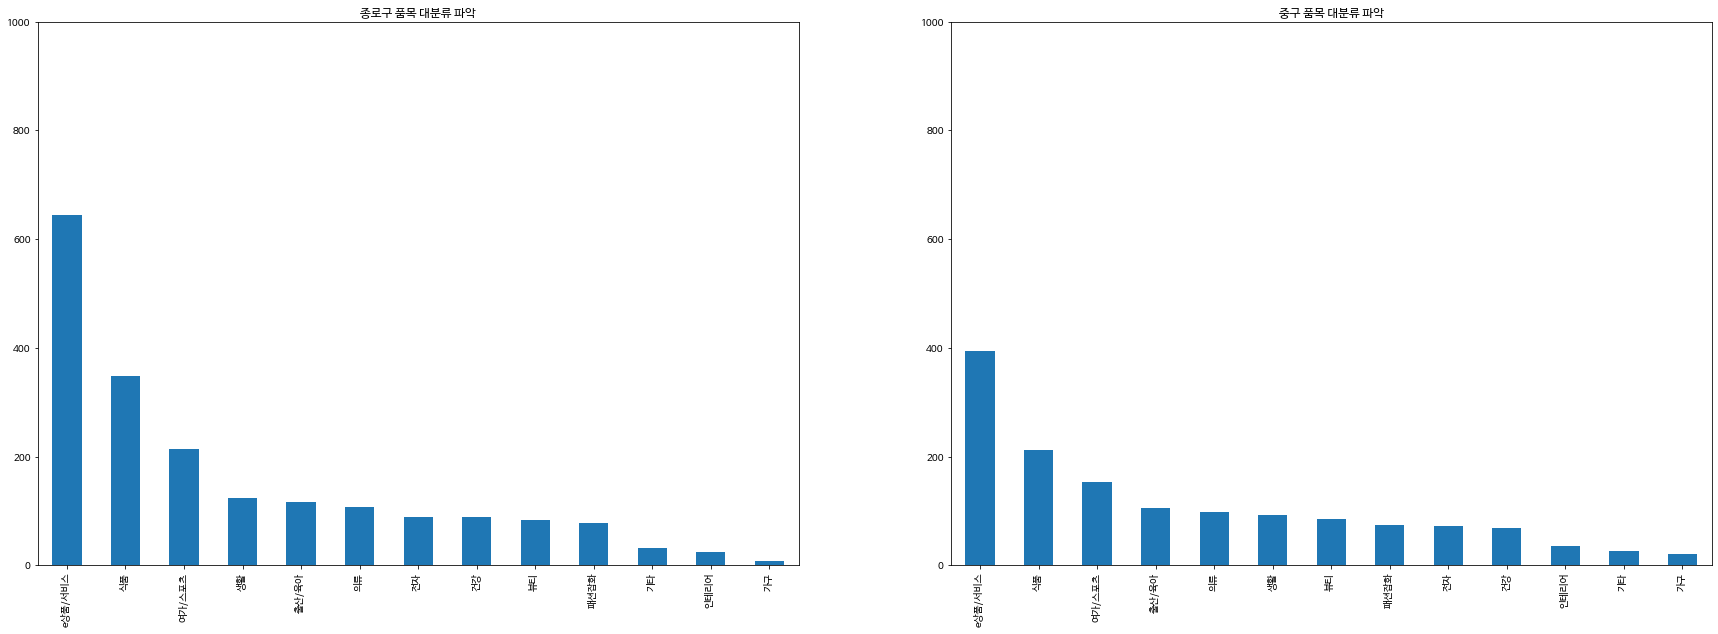

In [48]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(1,2,j+1)
    cluster2[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.title(cluster2_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

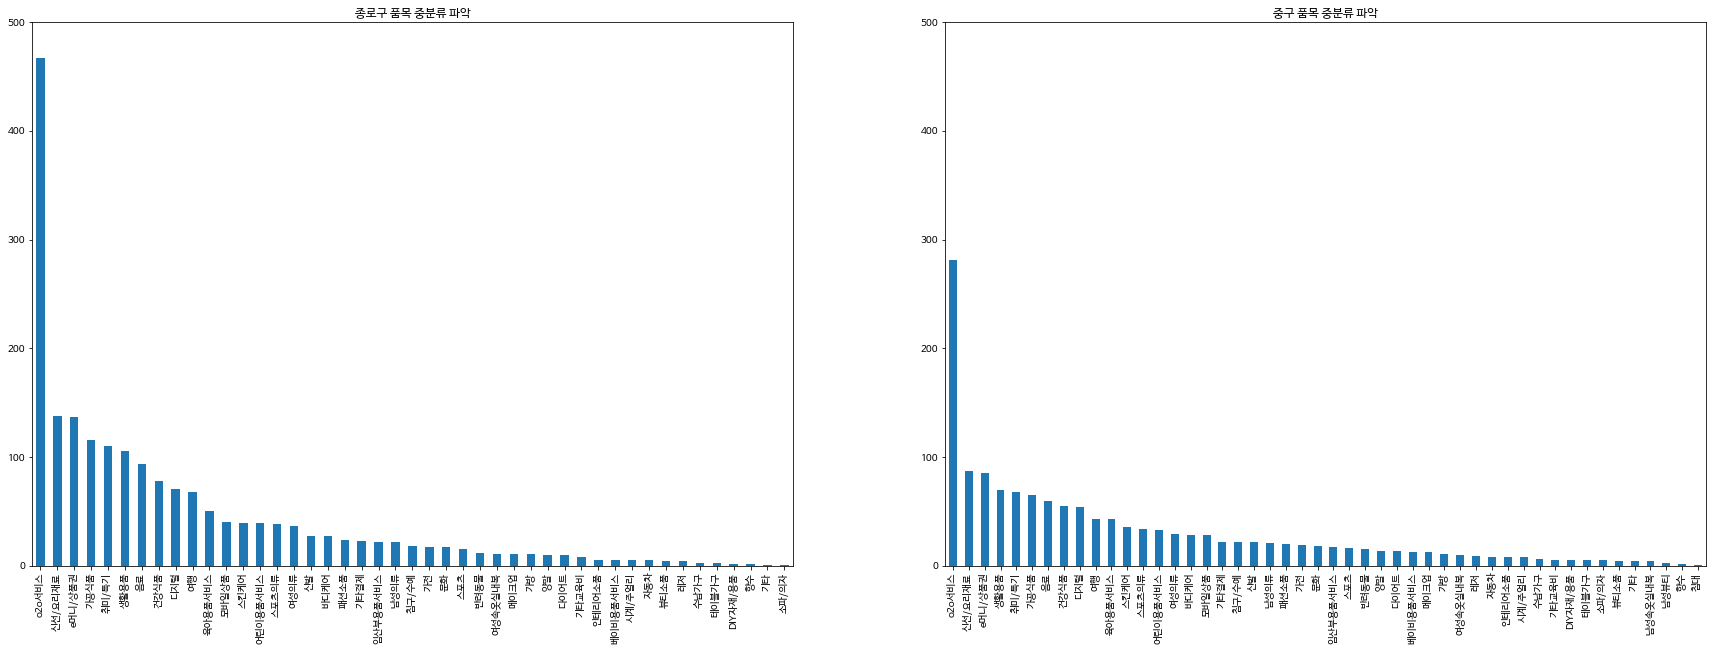

In [49]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(1,2,j+1)
    cluster2[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.title(cluster2_list[j]+ ' 품목 중분류 파악')

plt.plot

In [50]:
# cluster == 3
df_2103_cluster3 = df_2103[df_2103['large_moneycount_cluster'] == 3]
cluster3_list = []
cluster3_list = df_2103_cluster3['고객소재지_시군구'].unique()

print(cluster3_list)

iscluster3 = []
for i in range(len(cluster3_list)):
    iscluster3.append(df_2103_cluster3['고객소재지_시군구'] == cluster3_list[i])
    
cluster3 = []
for i in range(len(cluster3_list)):
    cluster3.append(df_2103_cluster3[iscluster3[i]])

['강북구' '도봉구' '금천구' '용산구' '성동구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

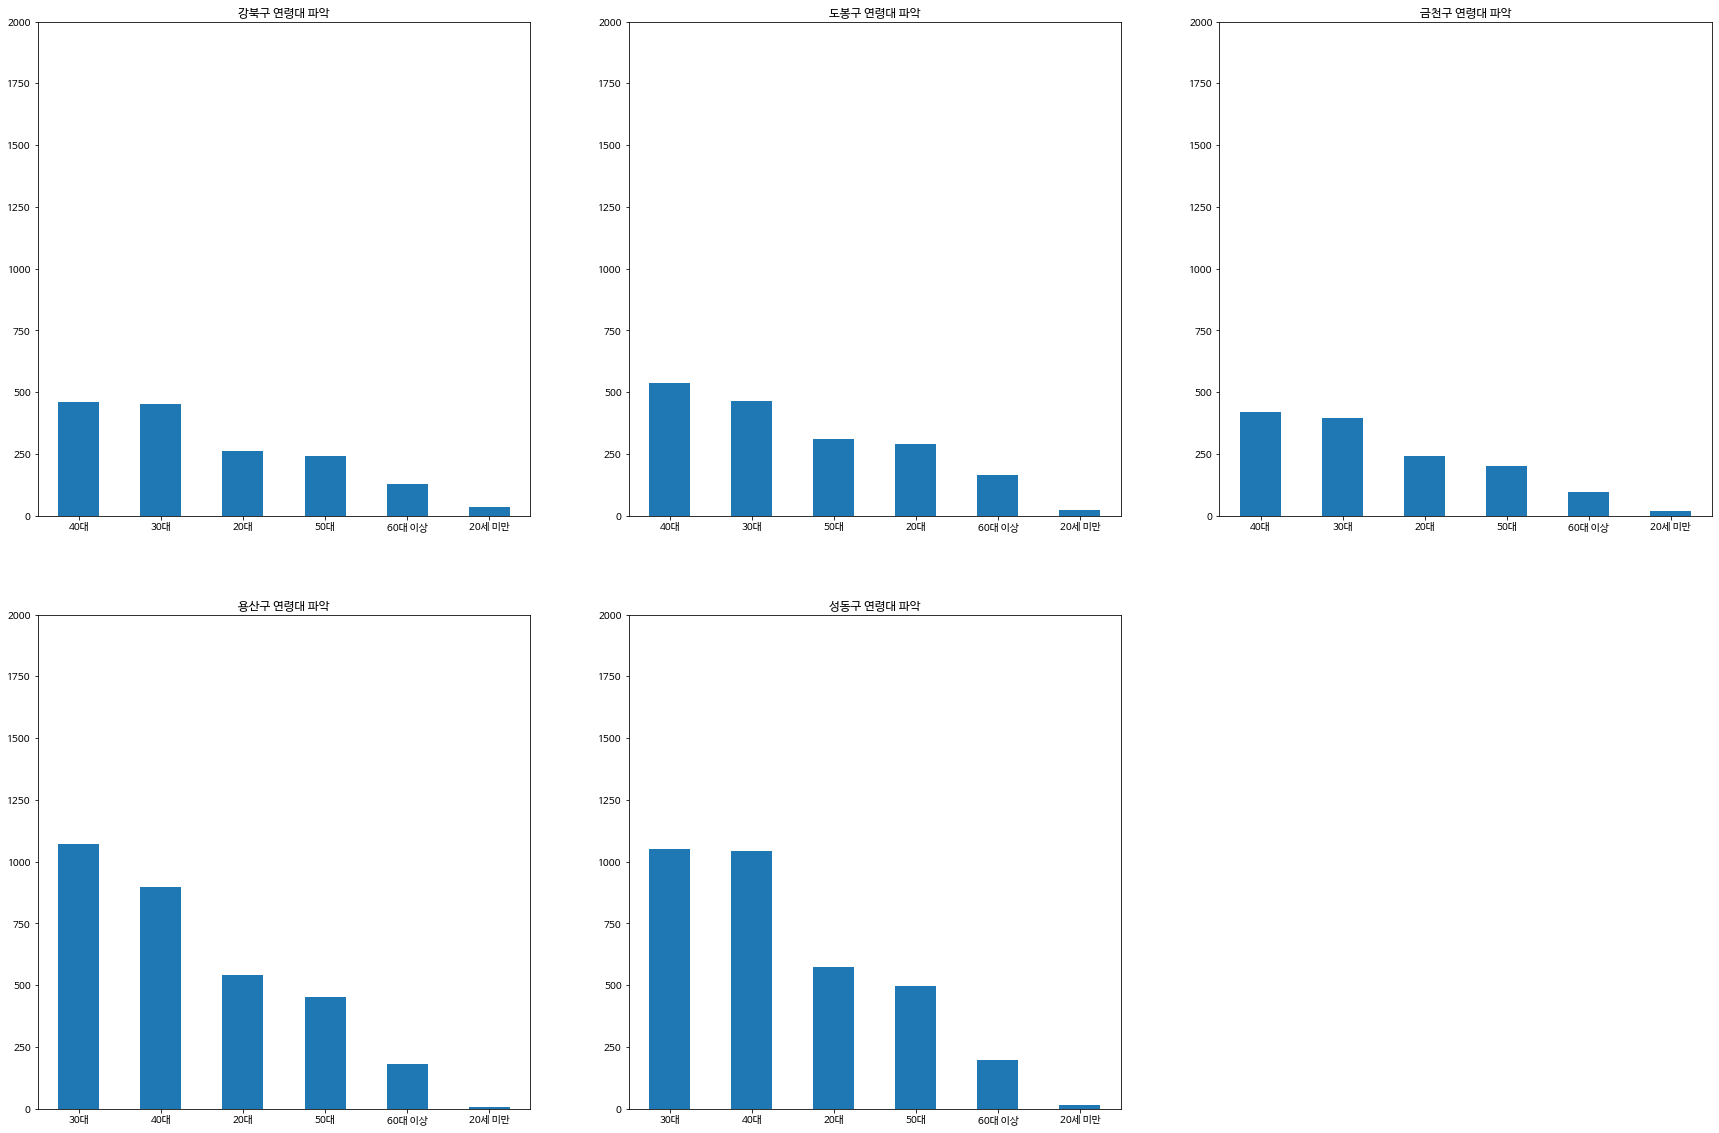

In [52]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(2,3,j+1)
    cluster3[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 2000])
    plt.xticks(rotation=0)
    plt.title(cluster3_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

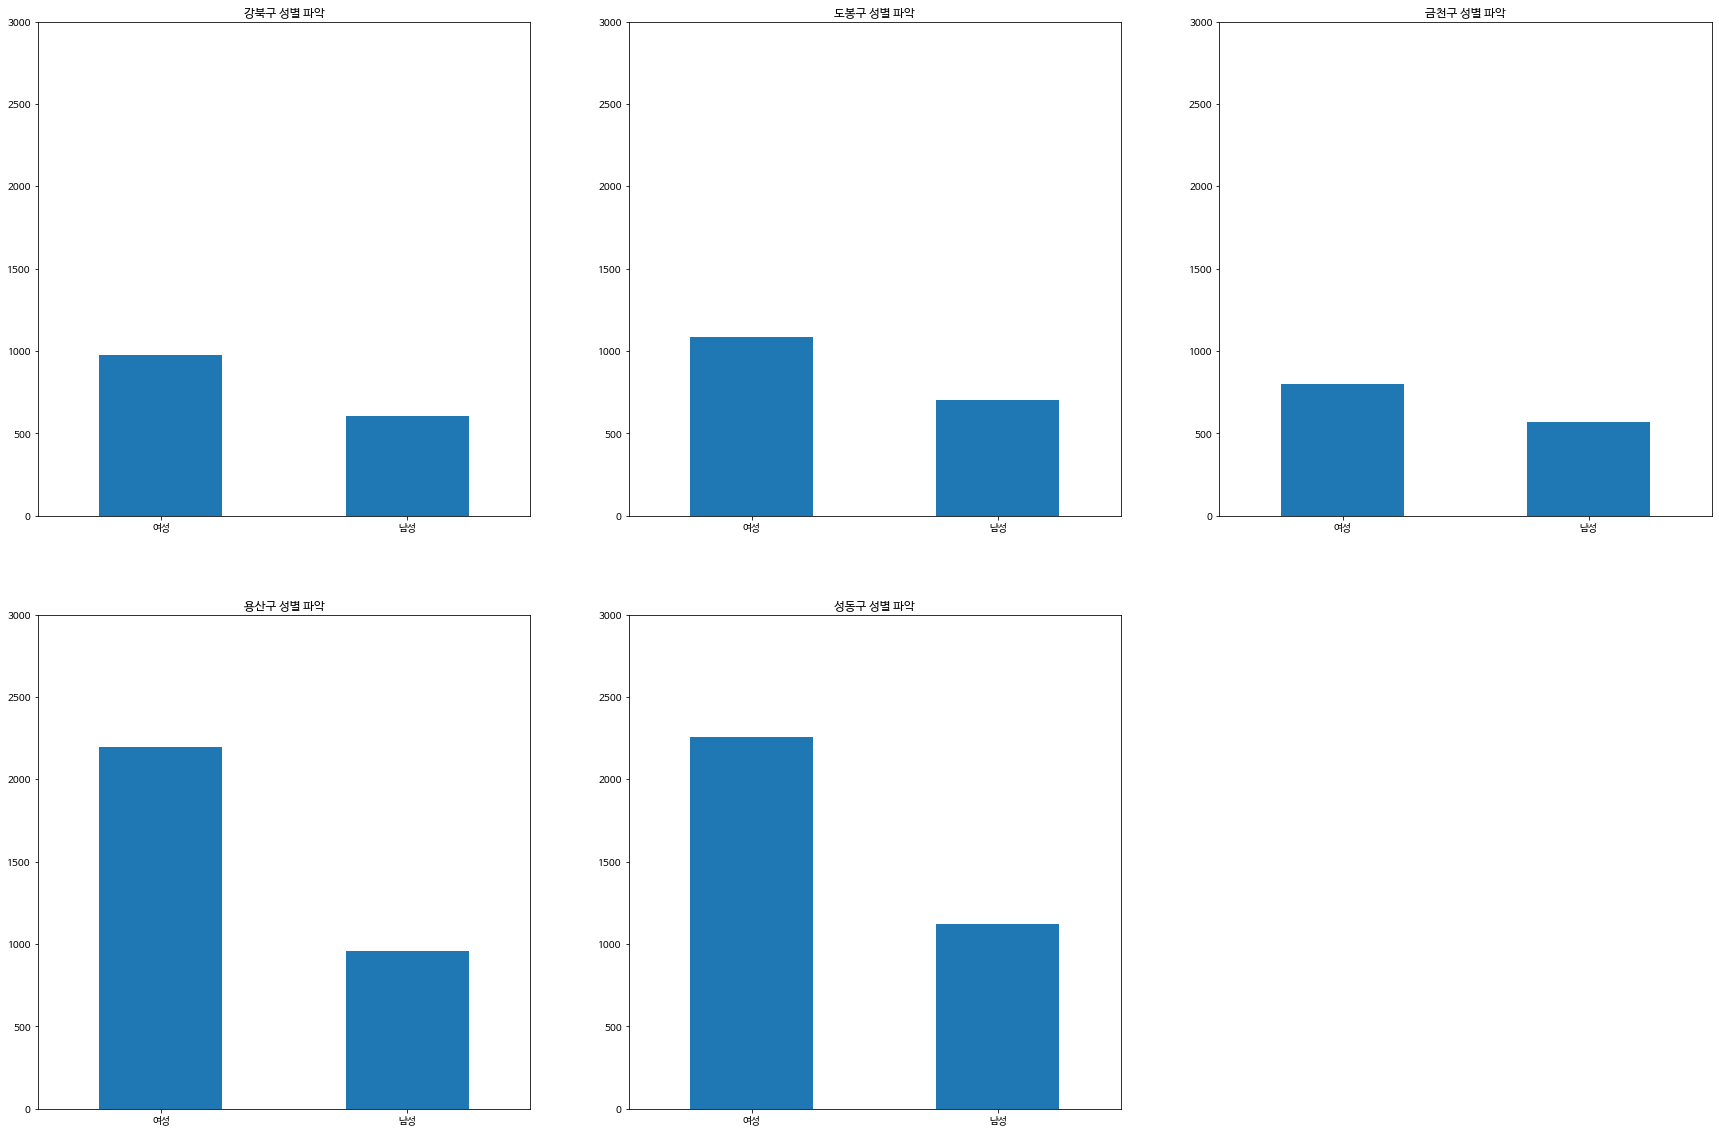

In [64]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(2,3,j+1)
    cluster3[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 3000])
    plt.xticks(rotation=0)
    plt.title(cluster3_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

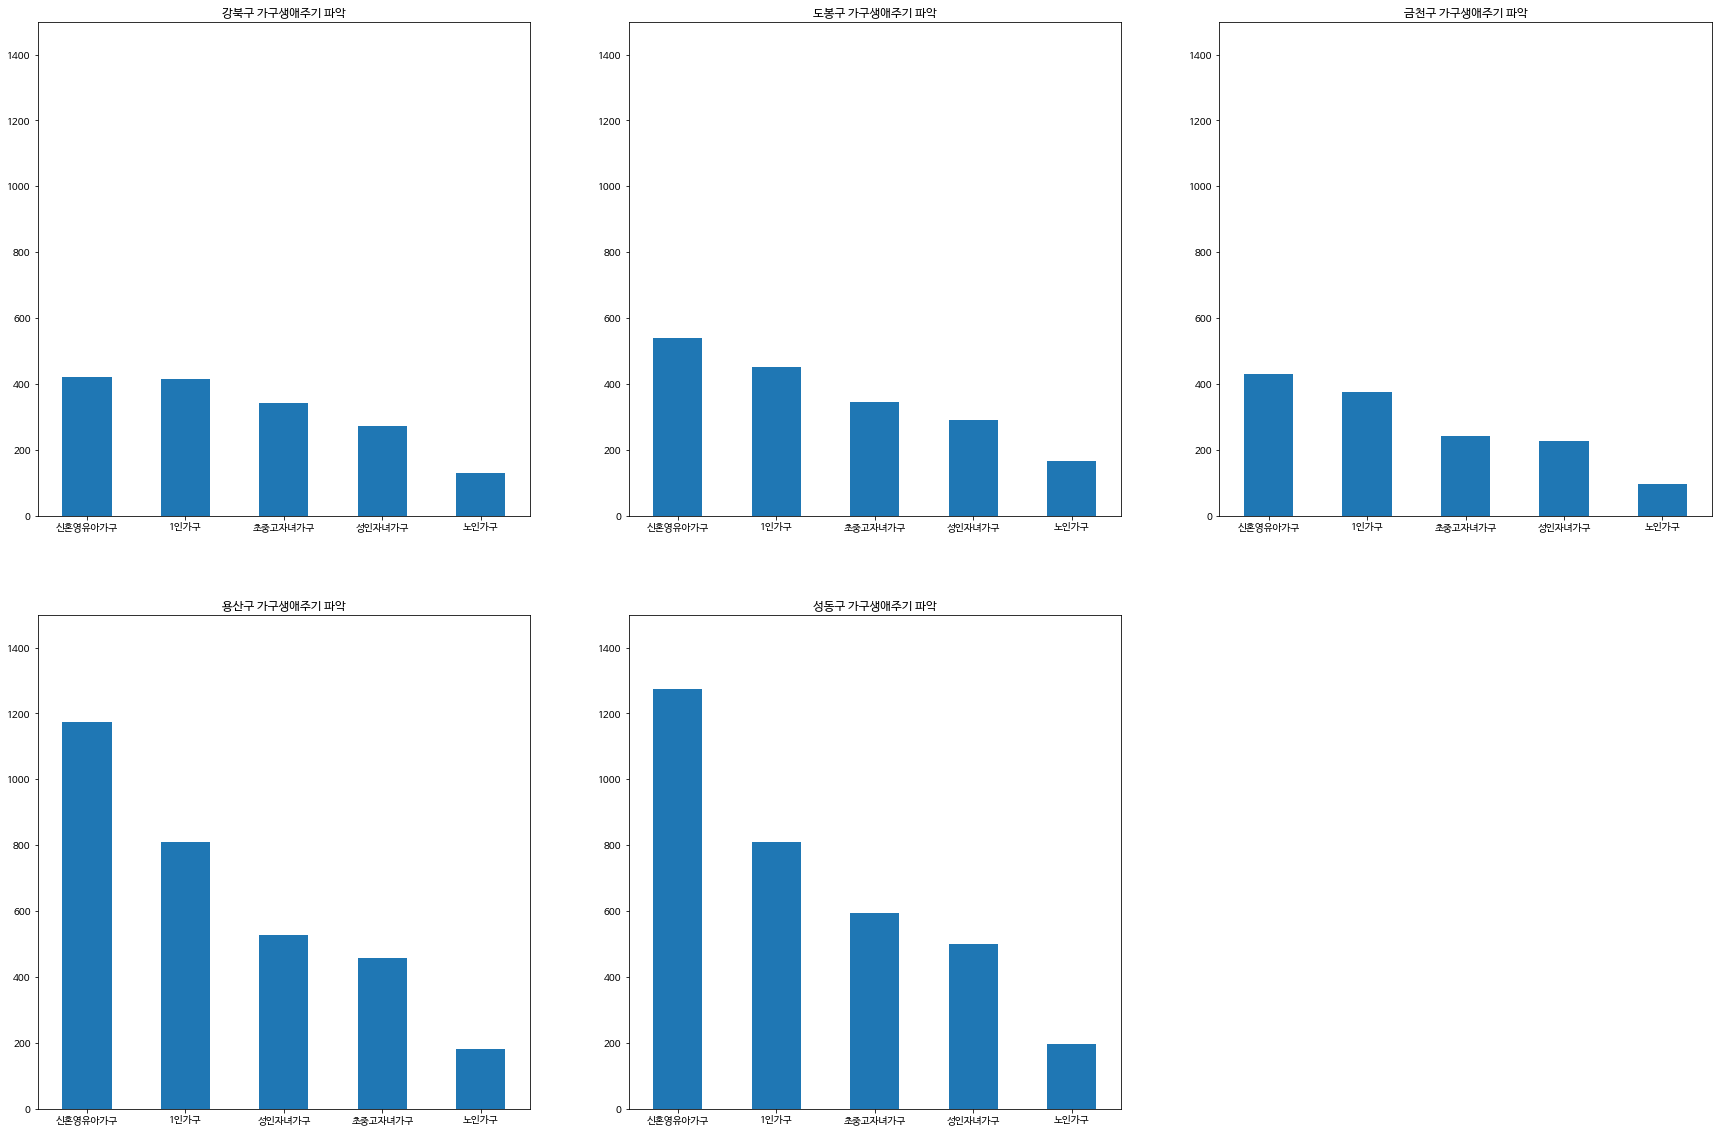

In [65]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(2,3,j+1)
    cluster3[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 1500])
    plt.xticks(rotation=0)
    plt.title(cluster3_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

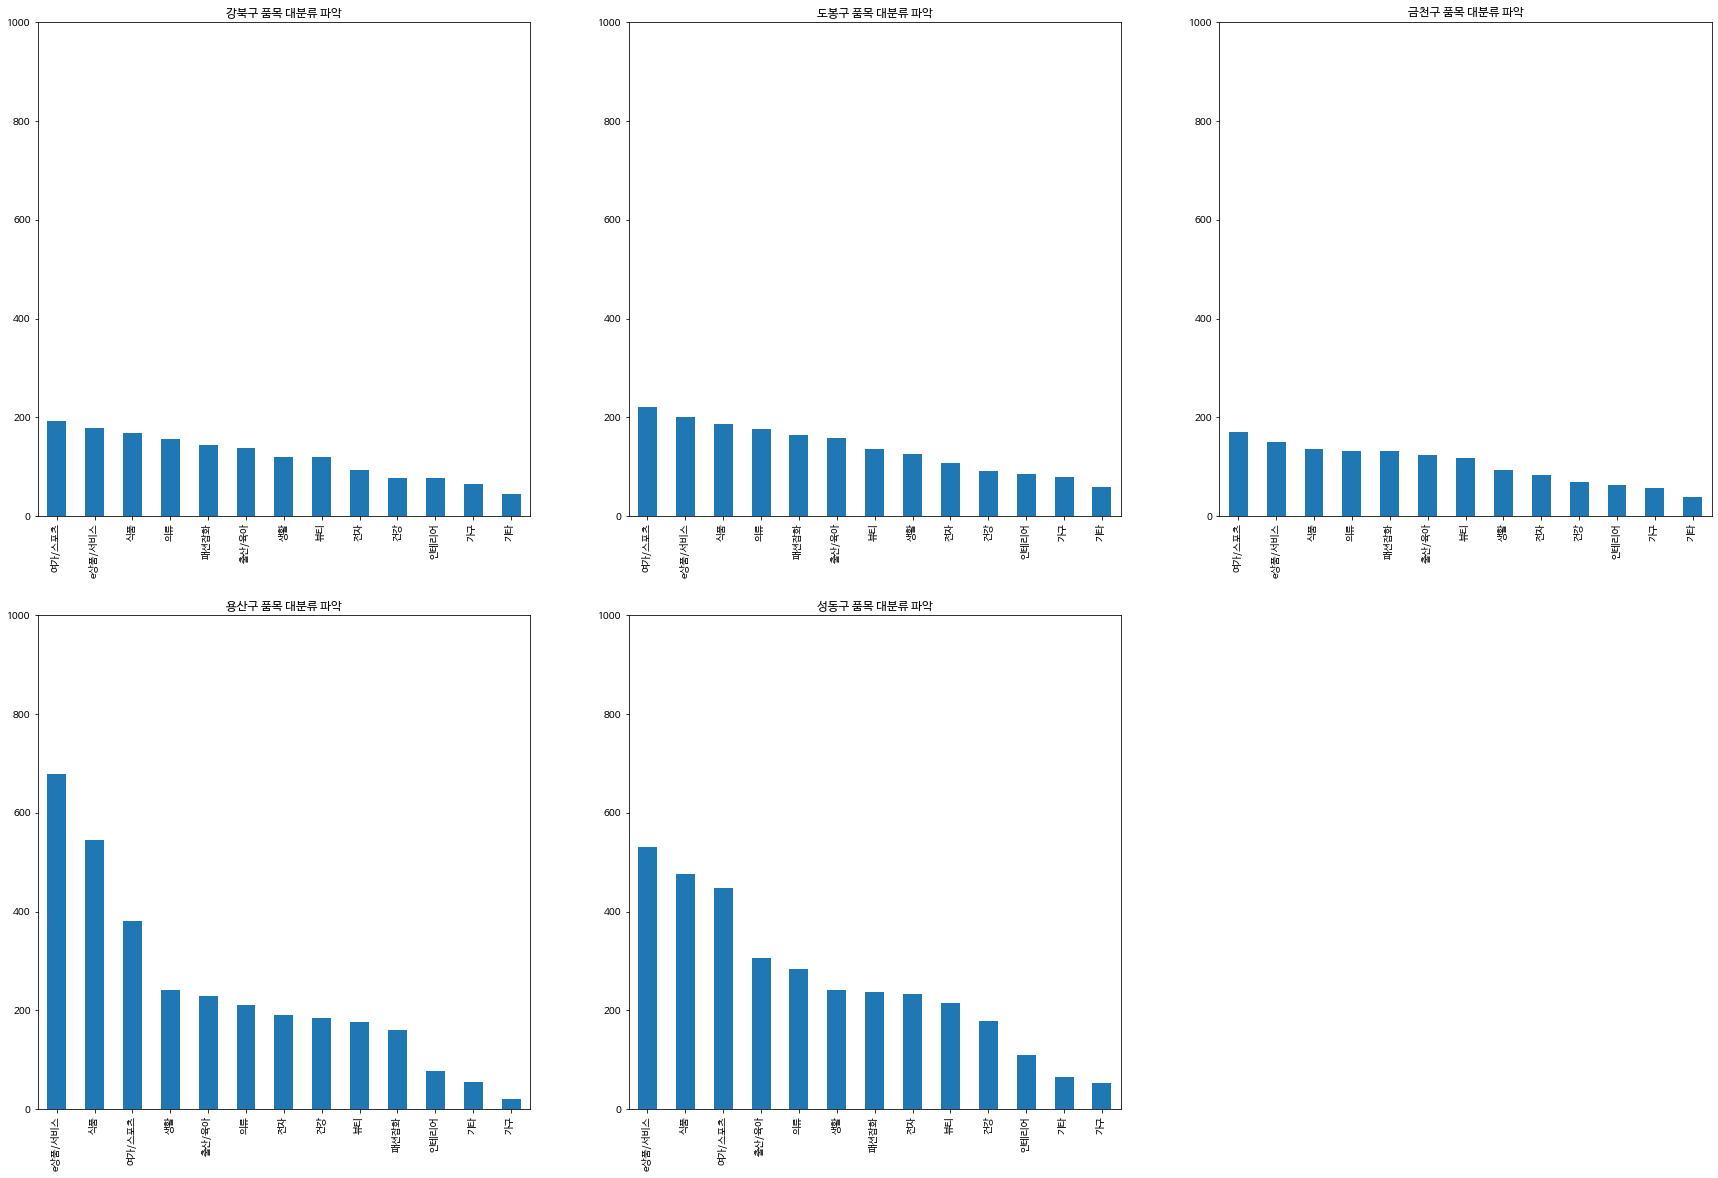

In [66]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(2,3,j+1)
    cluster3[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.title(cluster3_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

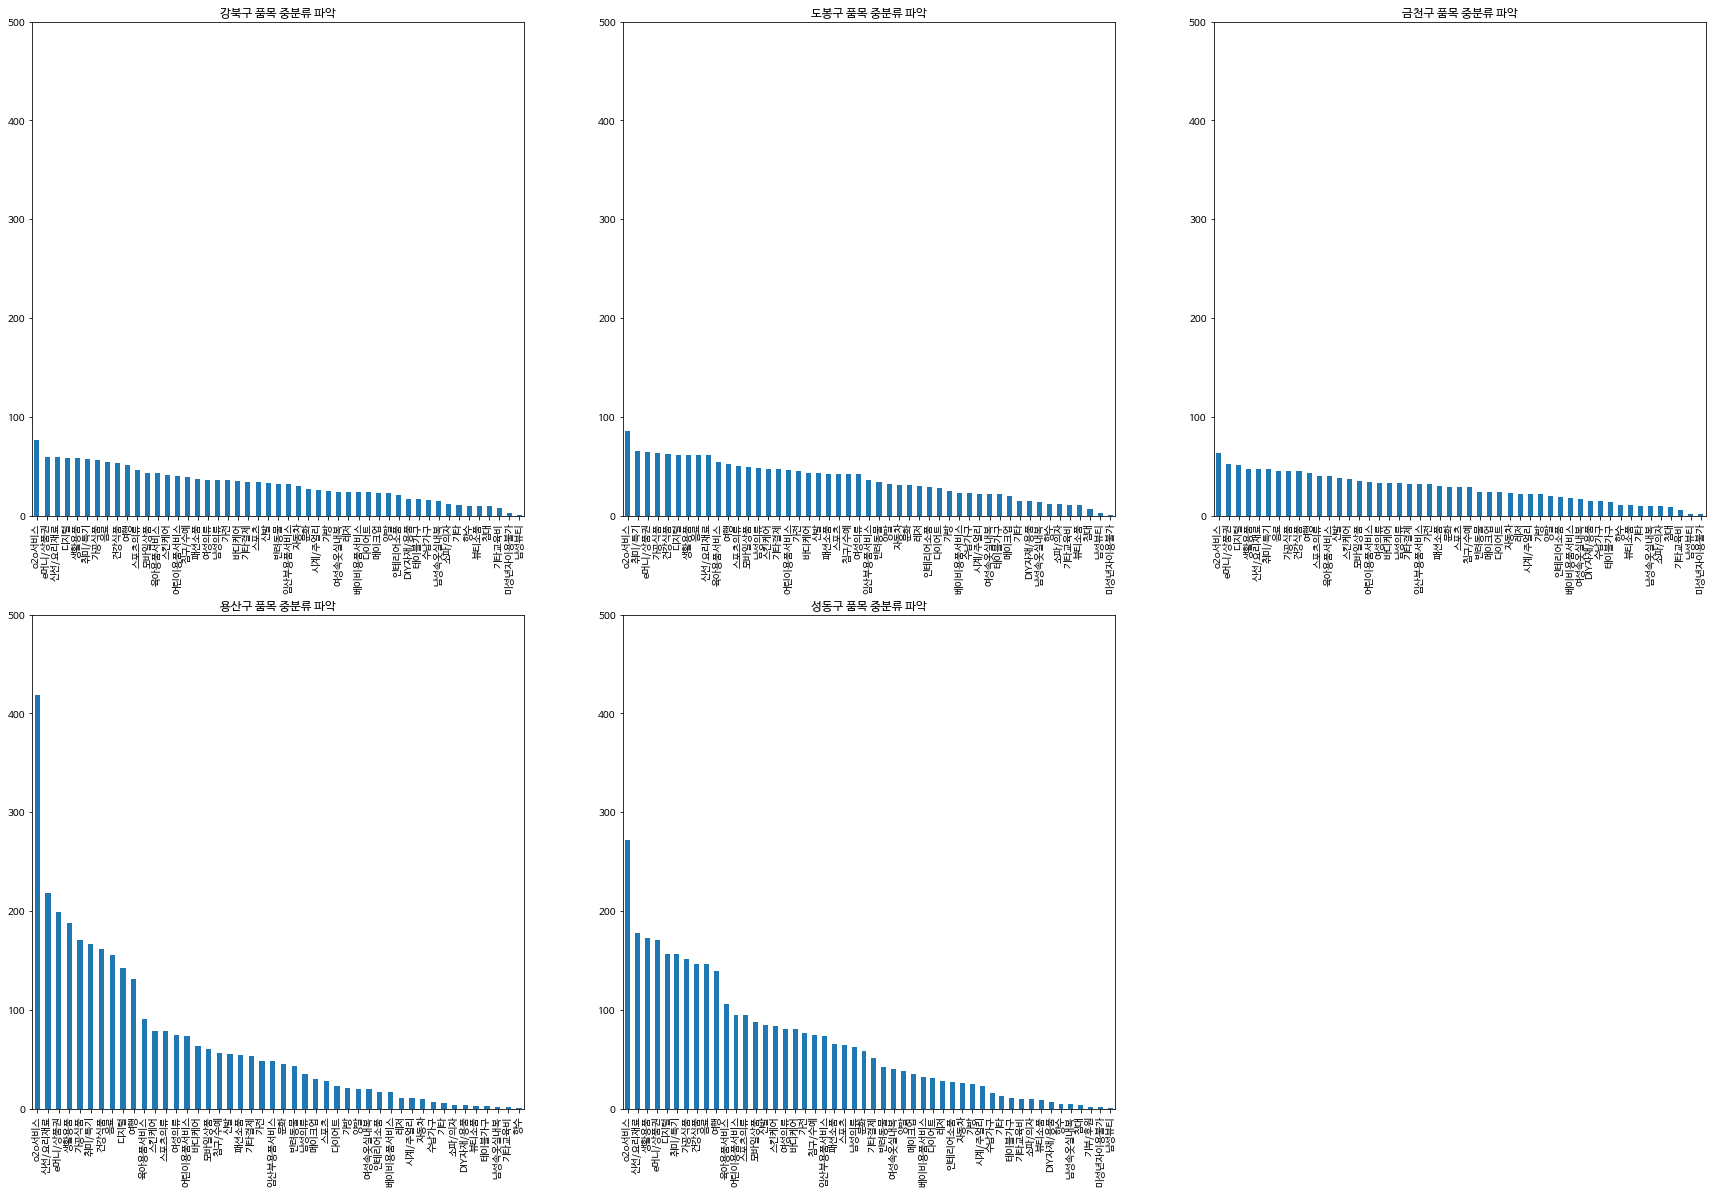

In [67]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(2,3,j+1)
    cluster3[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.title(cluster3_list[j]+ ' 품목 중분류 파악')

plt.plot

In [57]:
# cluster == 4
df_2103_cluster4 = df_2103[df_2103['large_moneycount_cluster'] == 4]
cluster4_list = []
cluster4_list = df_2103_cluster4['고객소재지_시군구'].unique()

print(cluster4_list)

iscluster4 = []
for i in range(len(cluster4_list)):
    iscluster4.append(df_2103_cluster4['고객소재지_시군구'] == cluster4_list[i])
    
cluster4 = []
for i in range(len(cluster4_list)):
    cluster4.append(df_2103_cluster4[iscluster4[i]])

['강동구' '마포구' '은평구' '노원구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

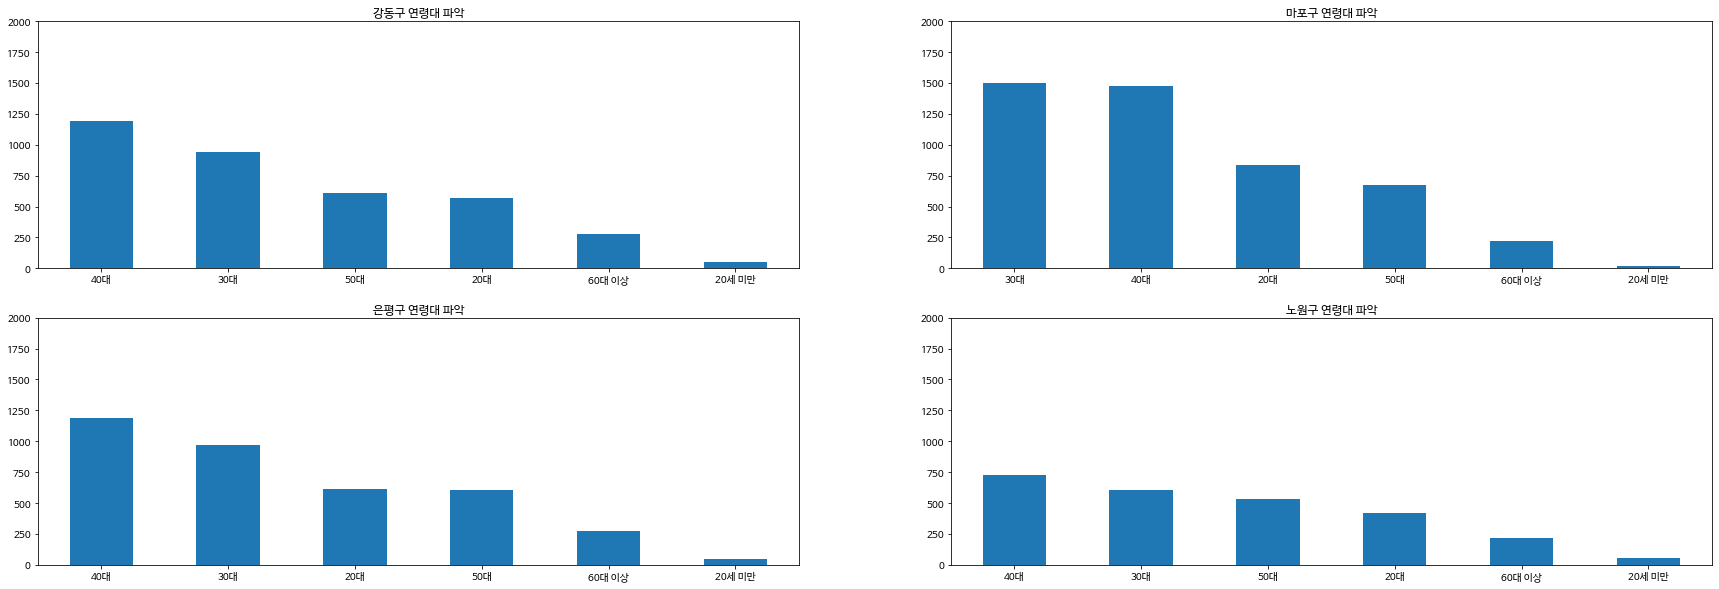

In [69]:
plt.figure(figsize = (30,10))

for j in range(len(cluster4_list)):
    plt.subplot(2,2,j+1)
    cluster4[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 2000])
    plt.xticks(rotation=0)
    plt.title(cluster4_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

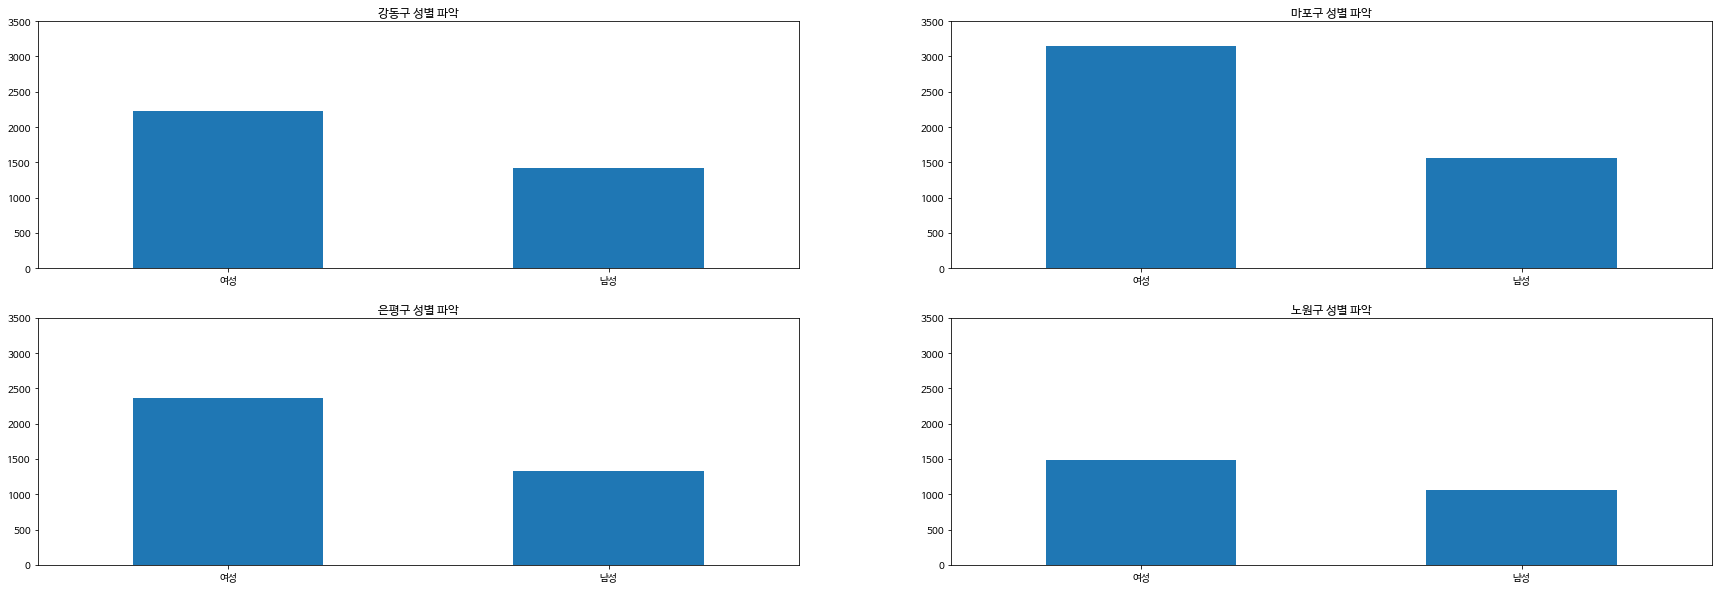

In [72]:
plt.figure(figsize = (30,10))

for j in range(len(cluster4_list)):
    plt.subplot(2,2,j+1)
    cluster4[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 3500])
    plt.xticks(rotation=0)
    plt.title(cluster4_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

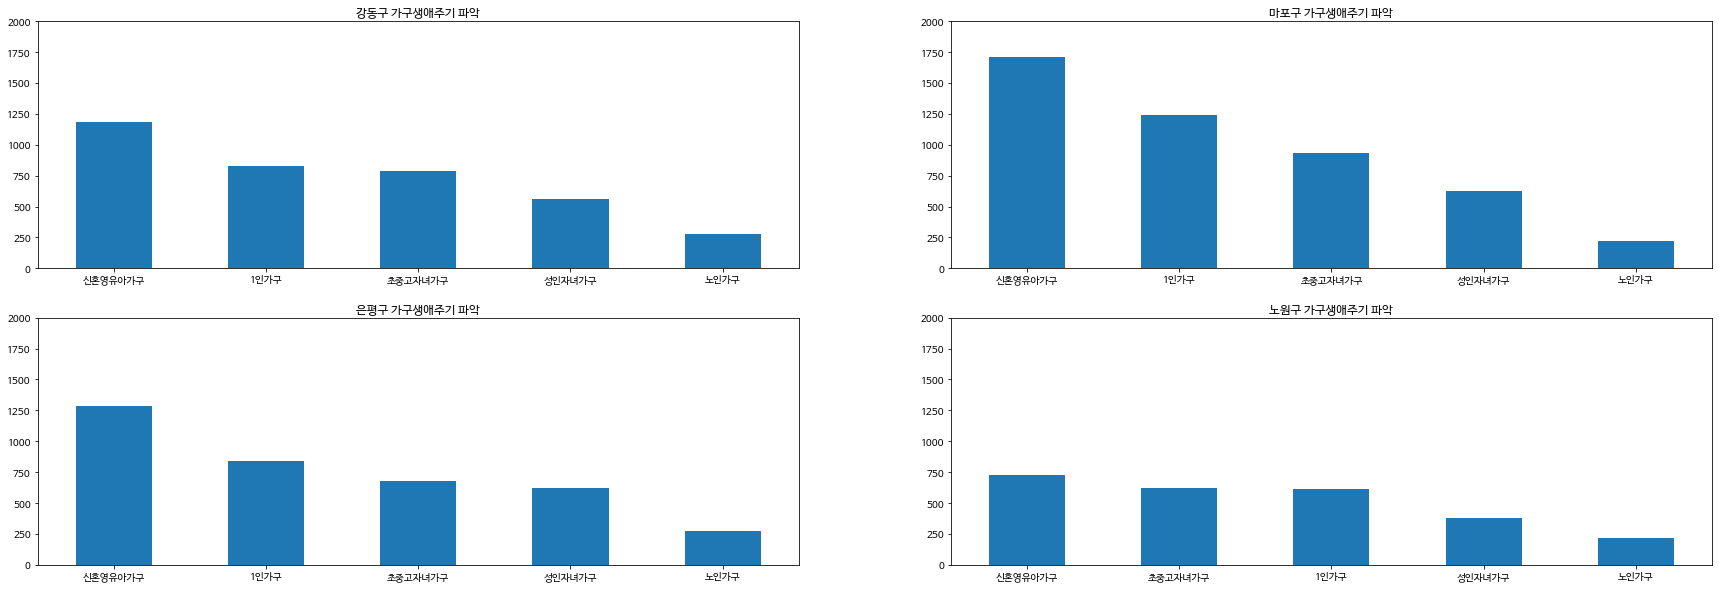

In [73]:
plt.figure(figsize = (30,10))

for j in range(len(cluster4_list)):
    plt.subplot(2,2,j+1)
    cluster4[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 2000])
    plt.xticks(rotation=0)
    plt.title(cluster4_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

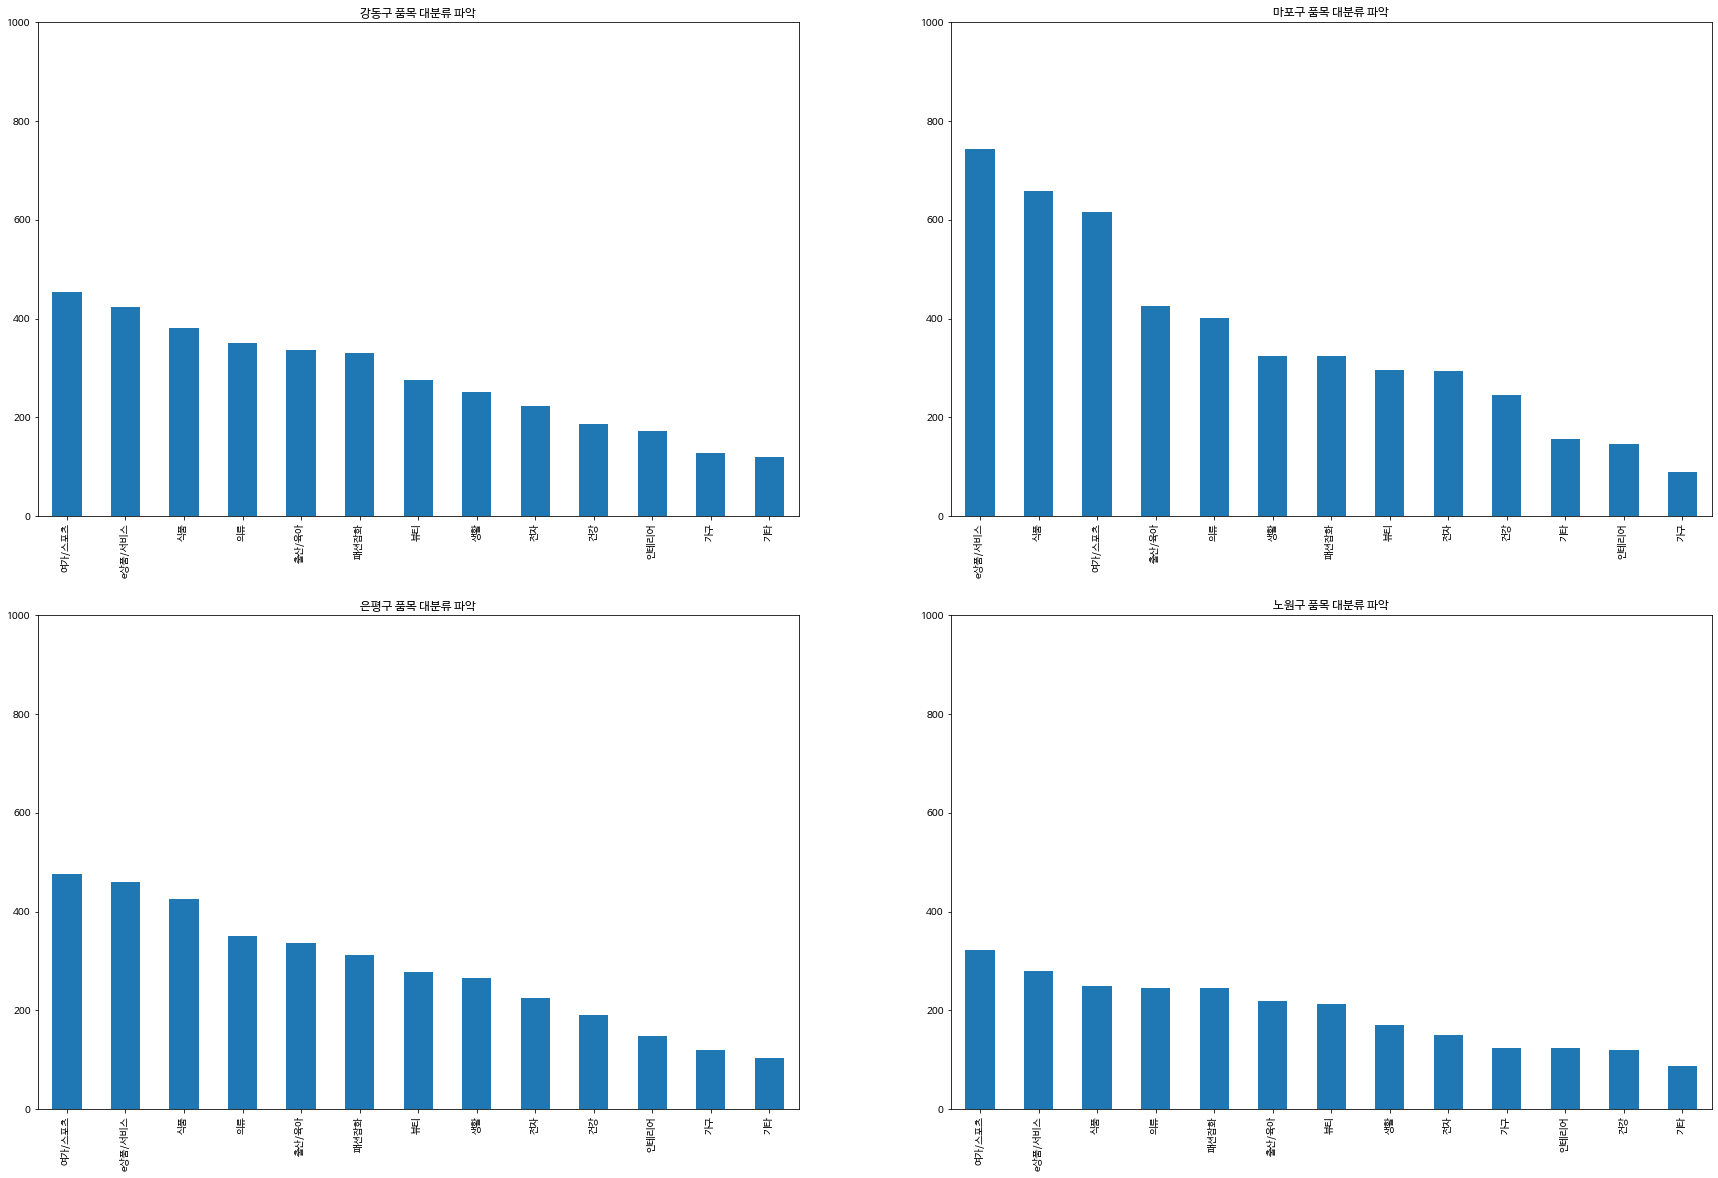

In [74]:
plt.figure(figsize = (30,20))

for j in range(len(cluster4_list)):
    plt.subplot(2,2,j+1)
    cluster4[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.title(cluster4_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

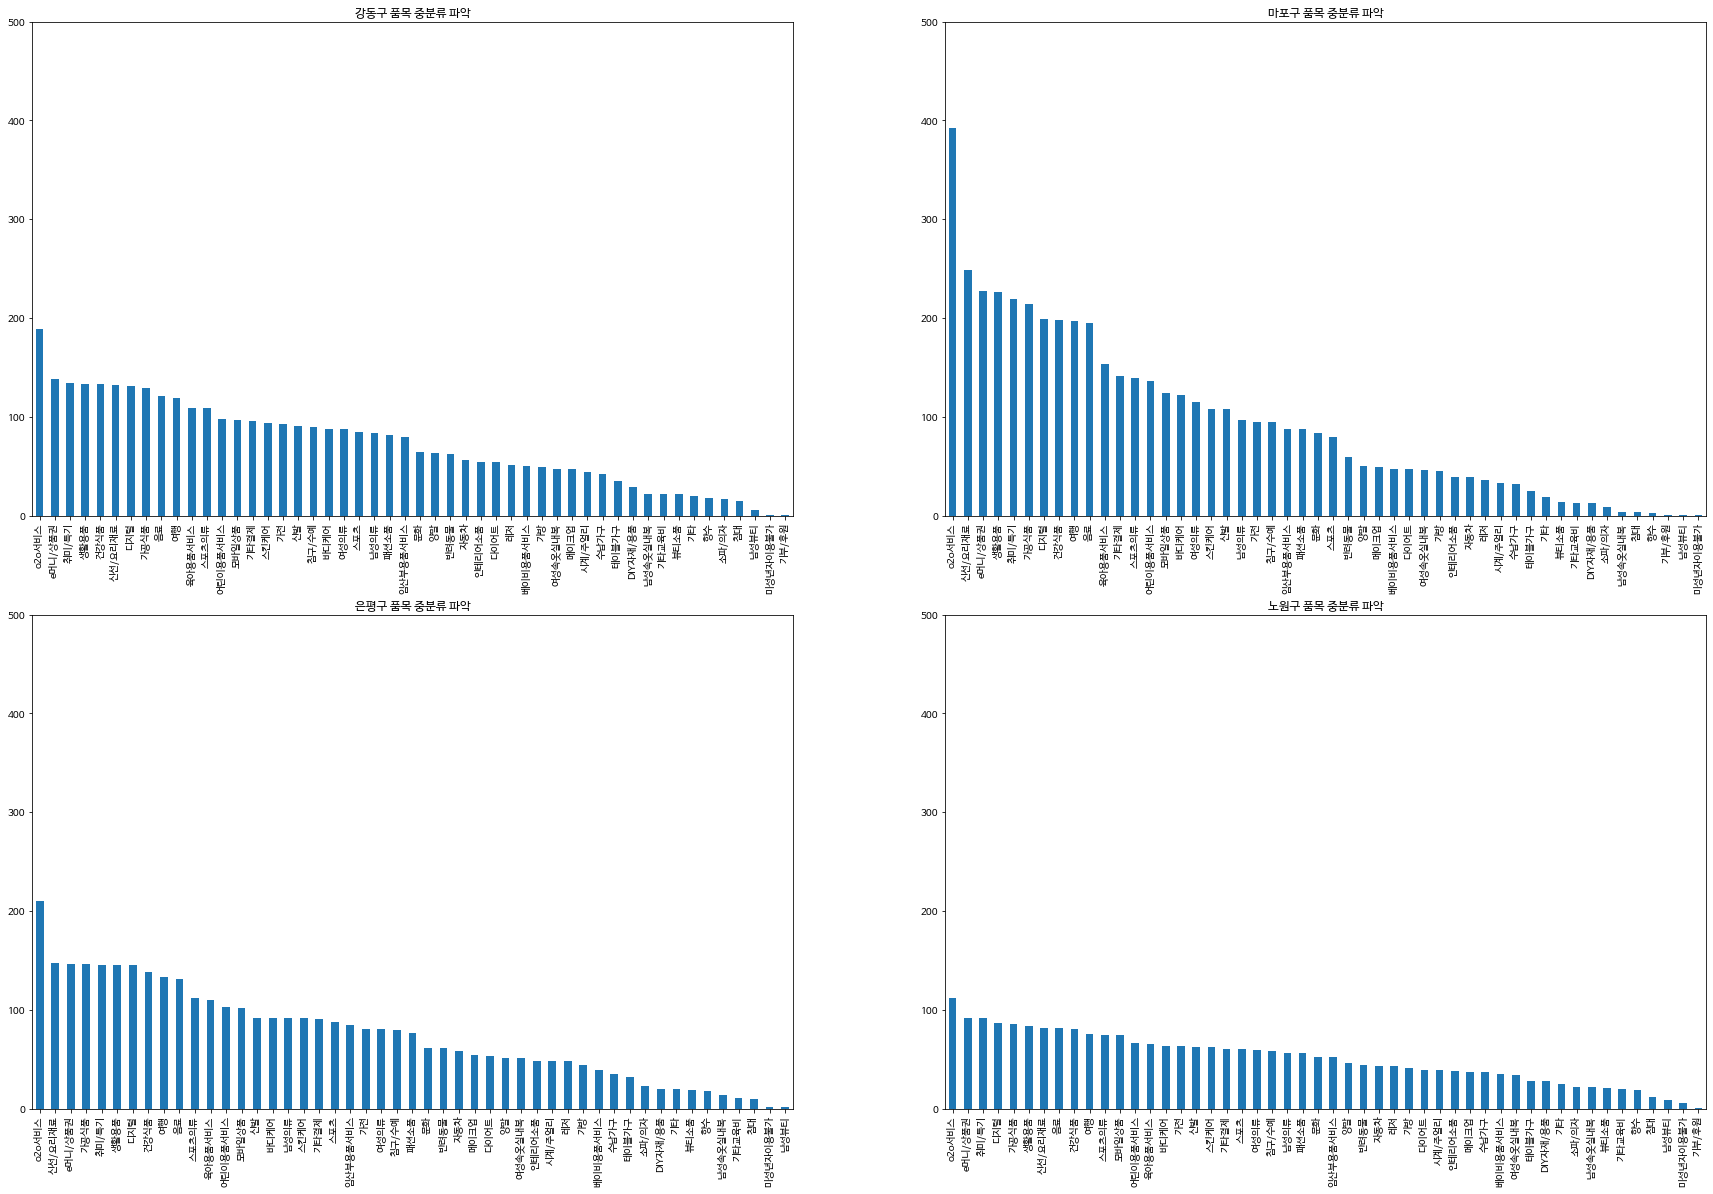

In [75]:
plt.figure(figsize = (30,20))

for j in range(len(cluster4_list)):
    plt.subplot(2,2,j+1)
    cluster4[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.title(cluster4_list[j]+ ' 품목 중분류 파악')

plt.plot